In [80]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle
import numpy as np 
import math
from tqdm import tqdm 

In [131]:
df = pd.read_csv('supermag-stations-info.csv')
df['region'] = np.nan
df

IAGA  GEOLON  GEOLAT  AACGMLON  AACGMLAT   STATION-NAME  OPERATOR-NUM  \
0    SON   66.44   25.12    139.81     19.36       Sonmiani             1   
1    AMU  210.13   61.24    -93.38     61.32      Anchorage             1   
2    YKC  245.52   62.48    -56.85     69.42    Yellowknife             3   
3    CBB  254.97   69.12    -47.81     77.05  Cambridge Bay             2   
4    RES  265.11   74.69    -35.54     82.93   Resolute Bay             2   
..   ...     ...     ...       ...       ...            ...           ...   
569  MHV   37.73   54.94    112.36     51.27       Mikhnevo             1   
570  NAD   72.51   65.53    147.36     61.94          Nadym             1   
571  WSE   33.10   66.55    112.22     63.39      White Sea             1   
572  POD   90.03   61.58    164.07     57.82            Bor             1   
573  TOR   13.18   56.09     90.99     52.76     Tormestorp             1   

       OPERATORS  region  
0    INTERMAGNET     NaN  
1         THEMIS     NaN  
2         CANMOS     NaN  
3         CANMOS     NaN  
4         CANMOS     NaN  
..           ...     ...  
569      IZMIRAN     NaN  
570      IZMIRAN     NaN  
571      IZMIRAN     NaN  
572      IZMIRAN     NaN  
573        IMAGE     NaN  

[574 rows x 9 columns]

In [132]:
with open('outputs/identified_regions_geo_grid.pkl', 'rb') as f:
	regions_dict = pickle.load(f)

In [133]:
for region in regions_dict.keys():
	for station in regions_dict[region]['stations']:
		df.loc[df['IAGA']==station, 'region'] = region

In [134]:
stations_to_remove = ['A09', 'A10', 'A11', 'ALT', 'ARK', 'ASA', 'ASH', 'B01', 
						'BJI', 'C09', 'CGO', 'CPL', 'CPY', 'CWE', 'DRB', 'E01', 
						'E02', 'E03', 'E04', 'EUA', 'FTN', 'FVE', 'GLK', 'GRK', 
						'KAU', 'KGD', 'KOR', 'KZN', 'LNN', 'M02', 'M11', 'MCE', 
						'MHV', 'MNK', 'MSK', 'MZH', 'NAD', 'NKK', 'NR2', 'NVL', 
						'PKS', 'PNL', 'POD', 'PRG', 'R01', 'R02', 'R03', 'R04', 
						'R05', 'R06', 'R07', 'R08', 'R09', 'R10', 'RSV', 'SAH', 
						'SAS', 'SKD', 'SMA', 'SUT', 'T26', 'T27', 'T60', 'T62', 
						'TKT', 'TLK', 'TOL', 'TOR', 'TTB', 'TUL', 'W01', 'W02', 
						'W03', 'W04', 'W05', 'WSE', 'WTK', 'YSS', 'KHS', 'BEY', 'KLI']

In [135]:
df = df[df['IAGA'].isin(stations_to_remove) == False]

In [136]:
def converting_from_degrees_to_km(lat_1, lon_1, lat_2, lon_2):

	mean_lat = (lat_1 + lat_2)/2
	x = lon_2 - lon_1
	y = lat_2 - lat_1
	dist_x = x*(111.320*math.cos(math.radians(mean_lat)))
	dist_y = y*110.574

	distance = math.sqrt((dist_x**2)+(dist_y**2))

	return distance

In [143]:
print(df.loc[df['IAGA']=='YKC']['region'].item())
print(df.loc[df['IAGA']=='CNL']['region'].item())

print(df.loc[df['IAGA']=='YKC']['GEOLON'].item())
print(df.loc[df['IAGA']=='CNL']['GEOLON'].item())

print(df.loc[df['IAGA']=='YKC']['GEOLAT'].item())
print(df.loc[df['IAGA']=='CNL']['GEOLAT'].item())

region_253
region_279
245.52
248.75
62.48
65.75


In [138]:
def finding_stations_close_to_the_line(df, distance_limit):	
	stations_close_to_line = {}
	for i in range(len(df)):
		close_by = []
		for j in range(len(df)):
			# if df.iloc[j]['IAGA'] in stations_close_to_line.keys():
			# 	if df.iloc[i]['IAGA'] in stations_close_to_line[df.iloc[j]['IAGA']]:
			# 		continue
			if df.iloc[j]['IAGA'] == df.iloc[i]['IAGA']:
				continue
			distance = converting_from_degrees_to_km(df.iloc[i]['GEOLAT'], df.iloc[i]['GEOLON'], df.iloc[j]['GEOLAT'], df.iloc[j]['GEOLON'])
			if (distance <= distance_limit) & (df.iloc[j]['region'] != df.iloc[i]['region']):
				close_by.append(df.iloc[j]['IAGA'])
			else:
				continue
		if len(close_by) > 0:
			stations_close_to_line[df.iloc[i]['IAGA']] = close_by
	
	return stations_close_to_line

In [147]:
# for limit in tqdm(range(50, 550, 50)):
limit = 250
stations_close_to_line = finding_stations_close_to_the_line(df, limit)
print('Distance limit: '+str(limit))
print(len(stations_close_to_line.keys()))
print(stations_close_to_line.keys())
print(stations_close_to_line)

Distance limit: 250
173
dict_keys(['AMU', 'SIT', 'PBQ', 'MEK', 'BOU', 'FRN', 'NEW', 'ESK', 'MAB', 'DOU', 'BFE', 'OTT', 'WNG', 'BEL', 'FUR', 'BDV', 'FRD', 'DED', 'ROE', 'UMQ', 'GDH', 'STF', 'SKT', 'GHB', 'MCW', 'MCG', 'MCR', 'SUM', 'TAL', 'CNL', 'DAW', 'SMI', 'ISL', 'PIN', 'NOR', 'NAL', 'LYR', 'HOP', 'SOR', 'TRO', 'AND', 'JCK', 'DON', 'RVK', 'SOL', 'KAR', 'HRN', 'KEV', 'MAS', 'KIL', 'IVA', 'ABK', 'LEK', 'MUO', 'LOZ', 'KIR', 'SOD', 'PEL', 'LYC', 'OUJ', 'HAN', 'NUR', 'TAR', 'KAV', 'ARC', 'FYU', 'EAG', 'CMO', 'PKR', 'CNB', 'CAN', 'DLR', 'HLP', 'LNP', 'LVV', 'LOP', 'GHC', 'PBC', 'AIA', 'CTA', 'GLN', 'LIV', 'CLK', 'APL', 'LAN', 'S01', 'OUL', 'YOR', 'VLD', 'OSO', 'ESC', 'OHI', 'LET', 'ROT', 'ELT', 'PAL', 'HLM', 'HOM', 'BGY', 'BFO', 'B12', 'B14', 'B15', 'B17', 'B18', 'B19', 'B20', 'B22', 'M06', 'M07', 'M08', 'B02', 'B04', 'B05', 'B06', 'B07', 'B16', 'B27', 'JCO', 'T03', 'C03', 'C05', 'C10', 'C08', 'C11', 'C12', 'C01', 'T19', 'T20', 'T22', 'T23', 'T34', 'T35', 'T38', 'T39', 'T43', 'HOR', 'PG1',

<Figure size 3000x2000 with 0 Axes>

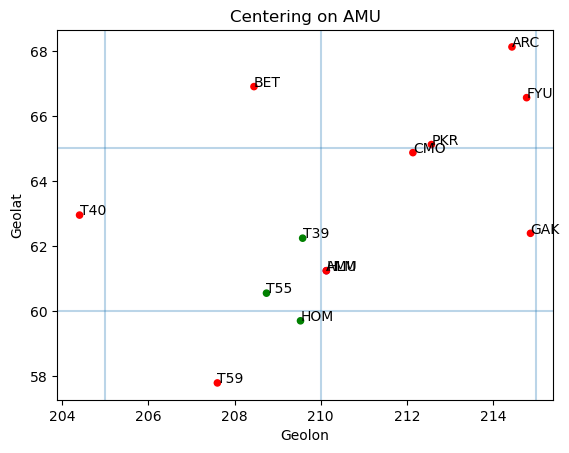

<Figure size 3000x2000 with 0 Axes>

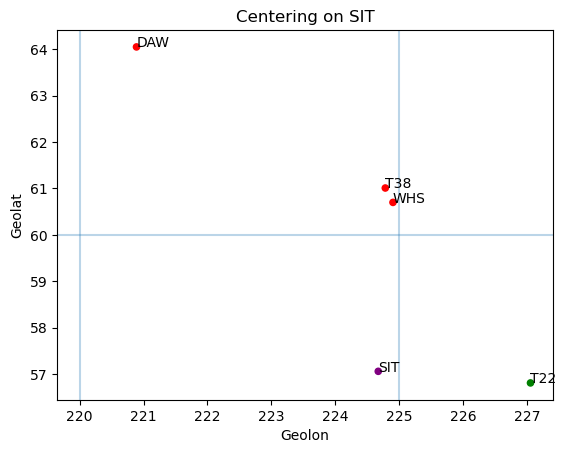

<Figure size 3000x2000 with 0 Axes>

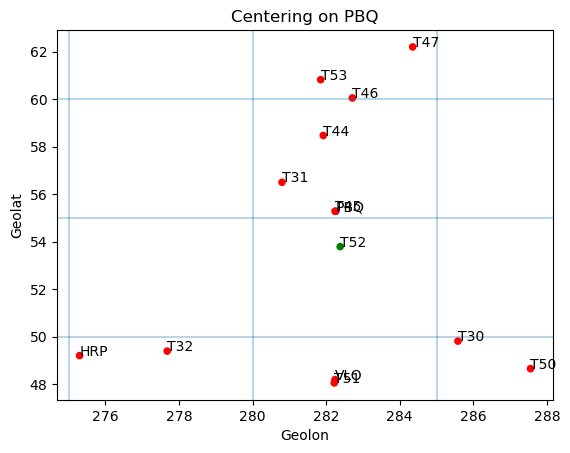

<Figure size 3000x2000 with 0 Axes>

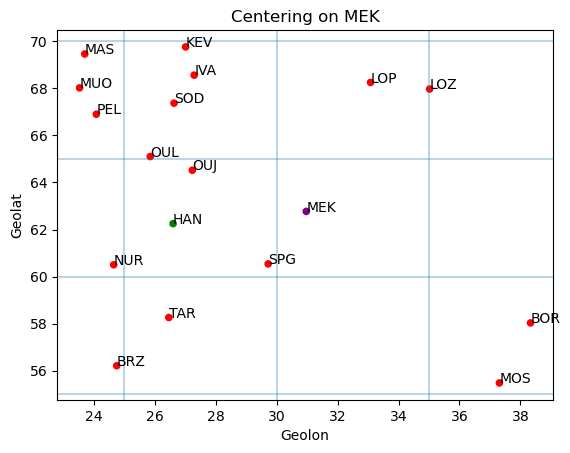

<Figure size 3000x2000 with 0 Axes>

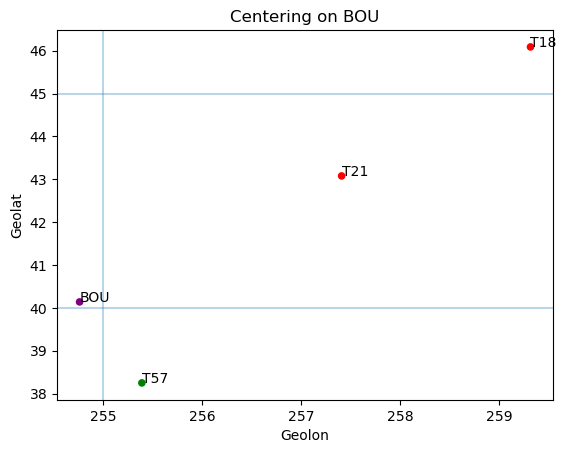

<Figure size 3000x2000 with 0 Axes>

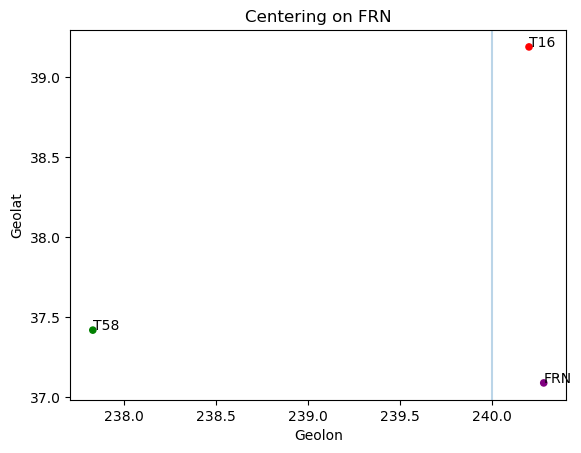

<Figure size 3000x2000 with 0 Axes>

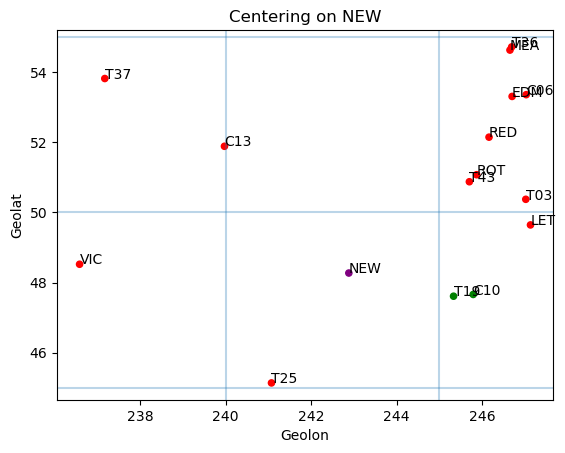

<Figure size 3000x2000 with 0 Axes>

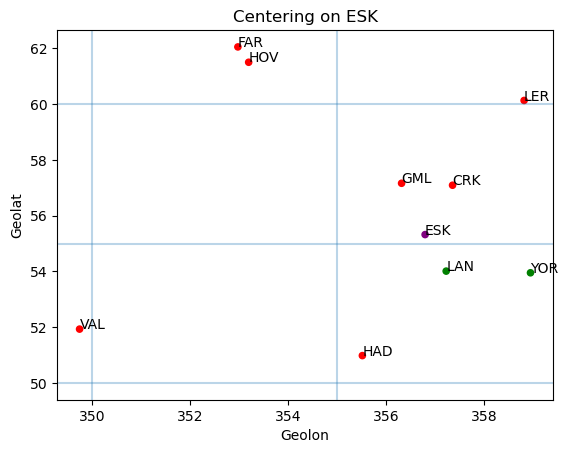

<Figure size 3000x2000 with 0 Axes>

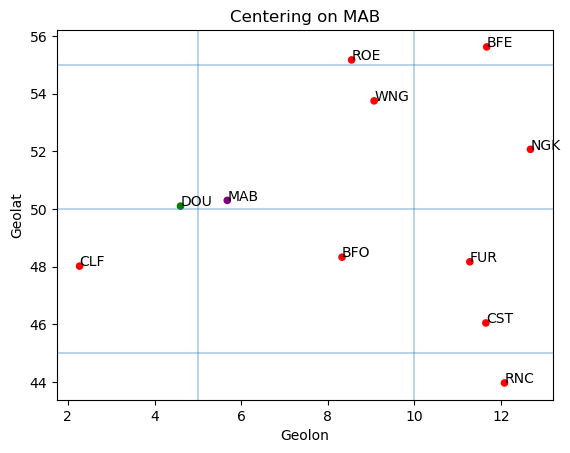

<Figure size 3000x2000 with 0 Axes>

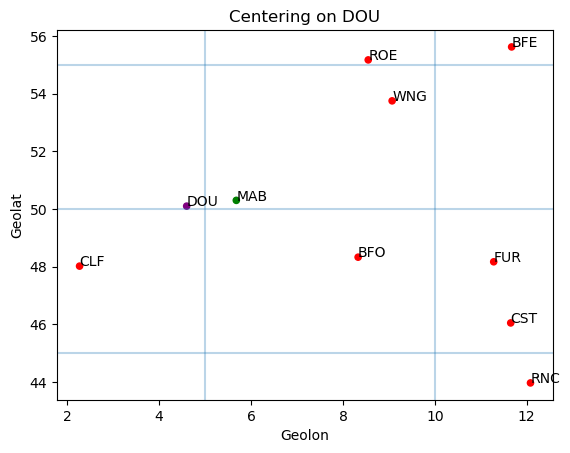

<Figure size 3000x2000 with 0 Axes>

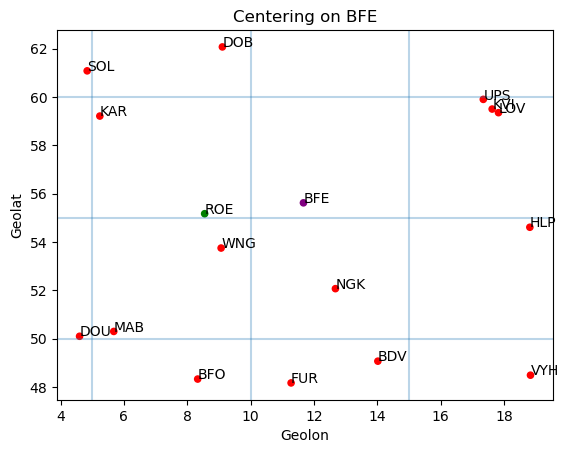

<Figure size 3000x2000 with 0 Axes>

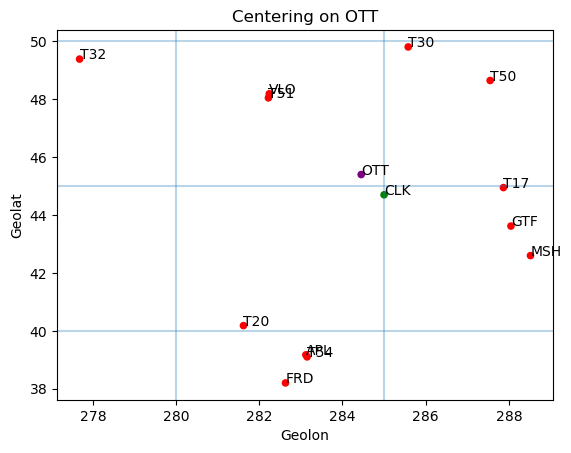

<Figure size 3000x2000 with 0 Axes>

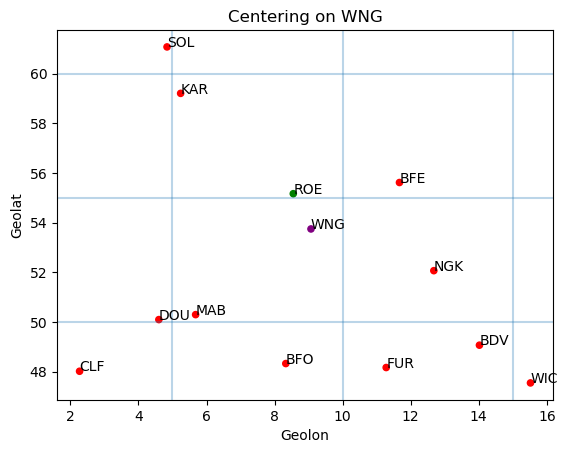

<Figure size 3000x2000 with 0 Axes>

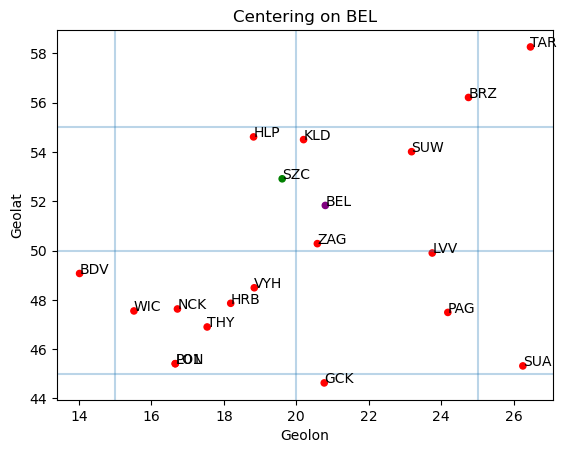

<Figure size 3000x2000 with 0 Axes>

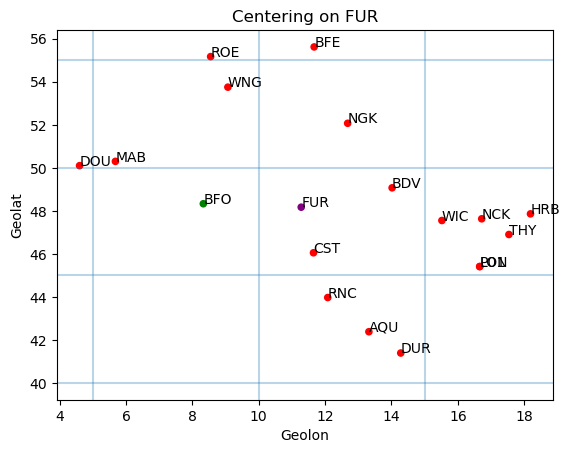

<Figure size 3000x2000 with 0 Axes>

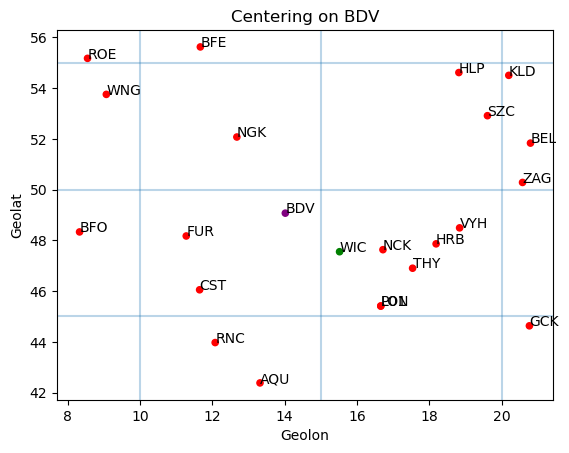

<Figure size 3000x2000 with 0 Axes>

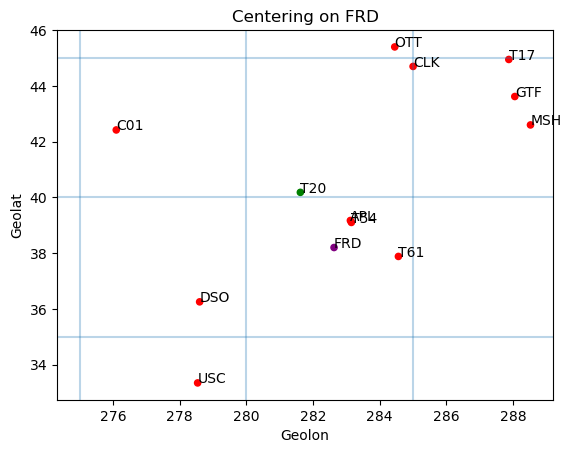

<Figure size 3000x2000 with 0 Axes>

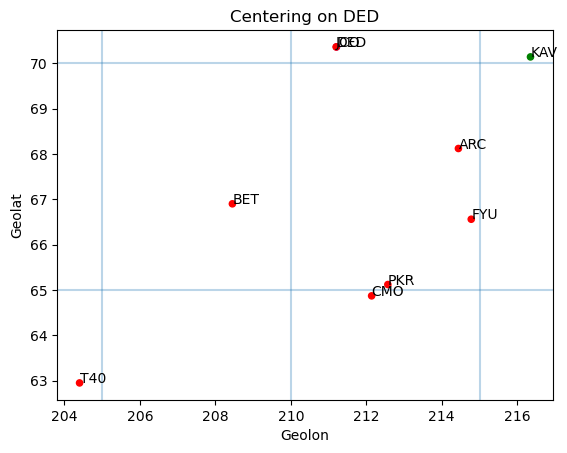

<Figure size 3000x2000 with 0 Axes>

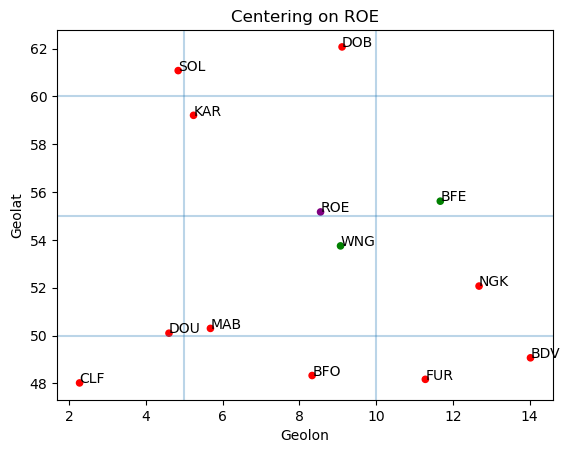

<Figure size 3000x2000 with 0 Axes>

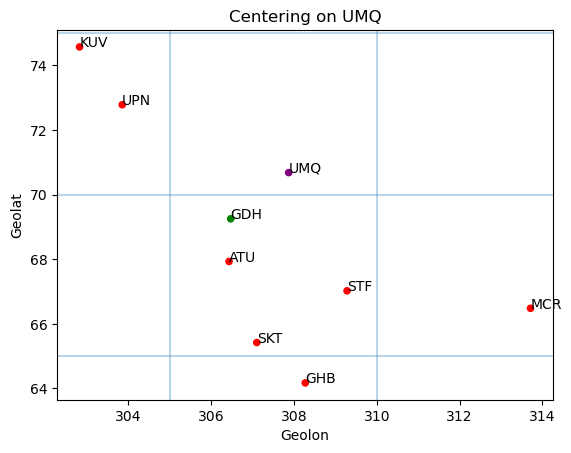

<Figure size 3000x2000 with 0 Axes>

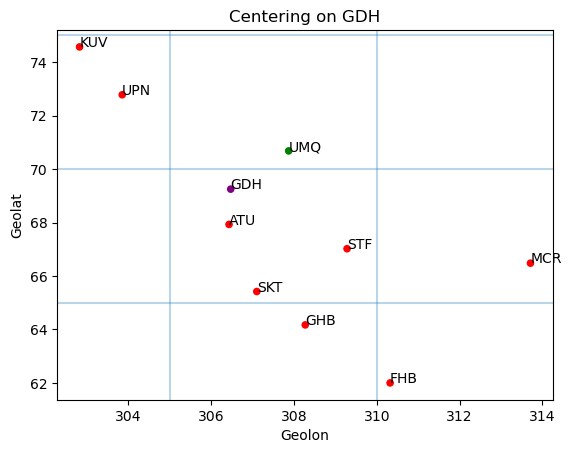

<Figure size 3000x2000 with 0 Axes>

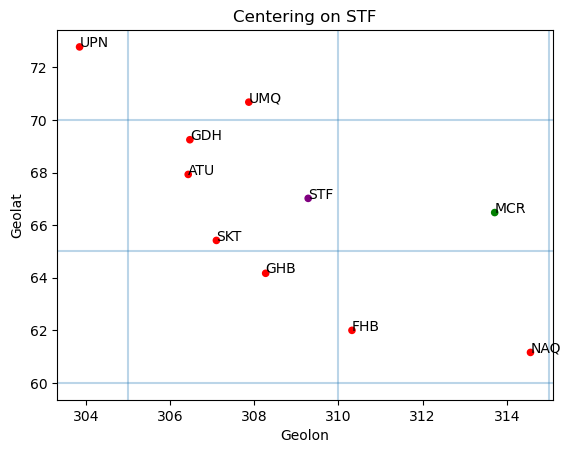

<Figure size 3000x2000 with 0 Axes>

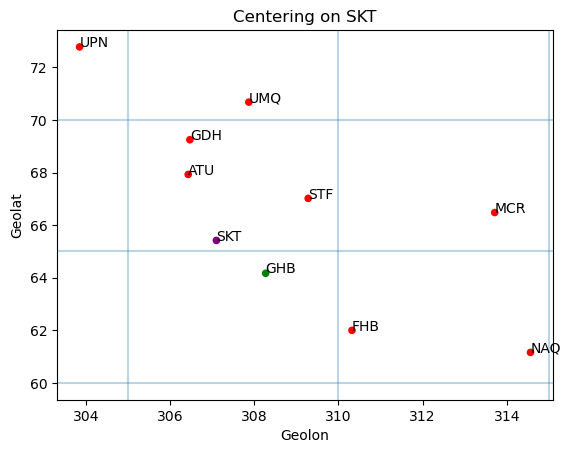

<Figure size 3000x2000 with 0 Axes>

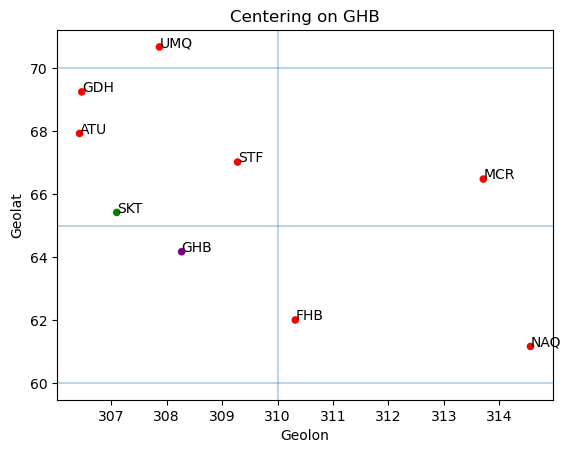

<Figure size 3000x2000 with 0 Axes>

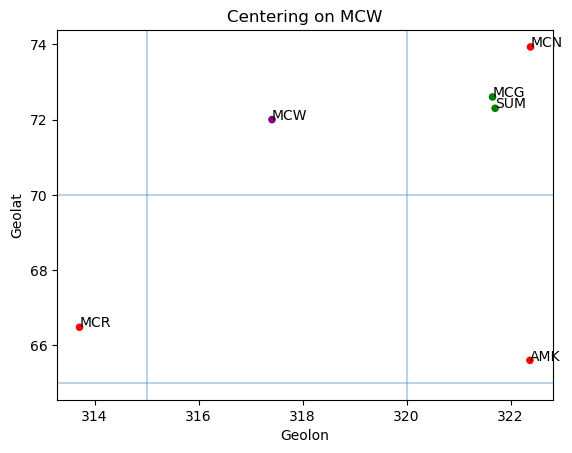

<Figure size 3000x2000 with 0 Axes>

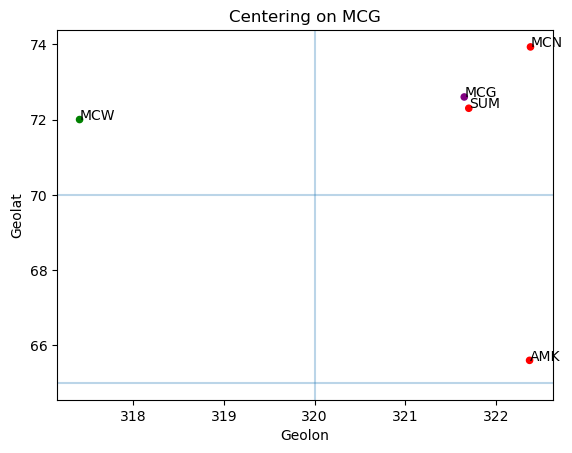

<Figure size 3000x2000 with 0 Axes>

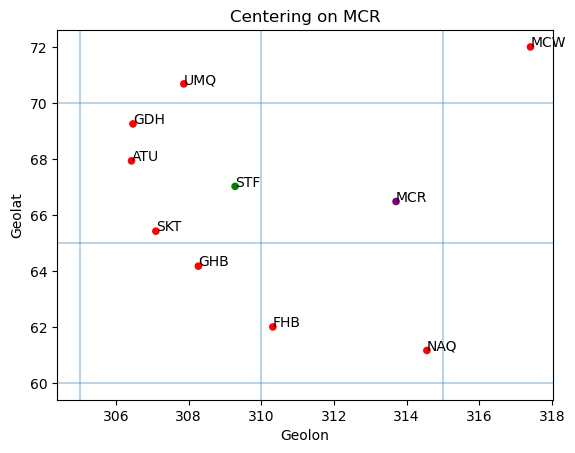

<Figure size 3000x2000 with 0 Axes>

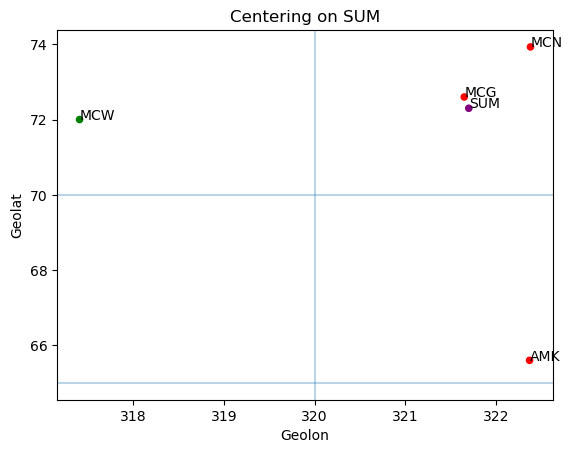

<Figure size 3000x2000 with 0 Axes>

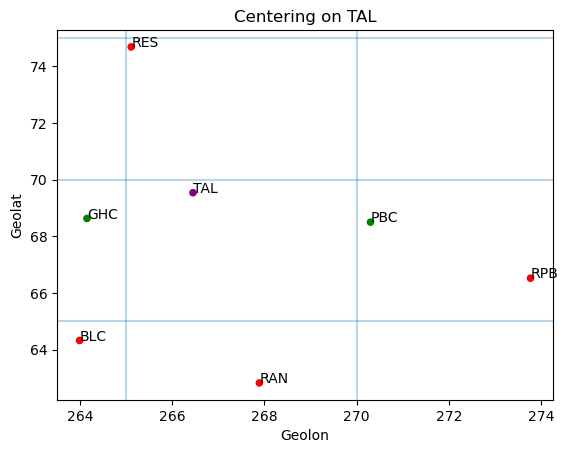

<Figure size 3000x2000 with 0 Axes>

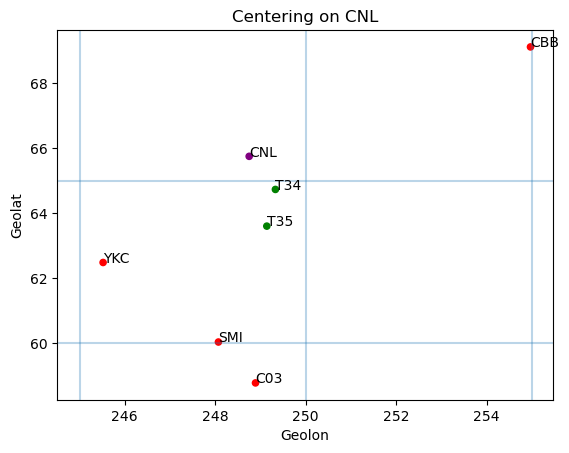

<Figure size 3000x2000 with 0 Axes>

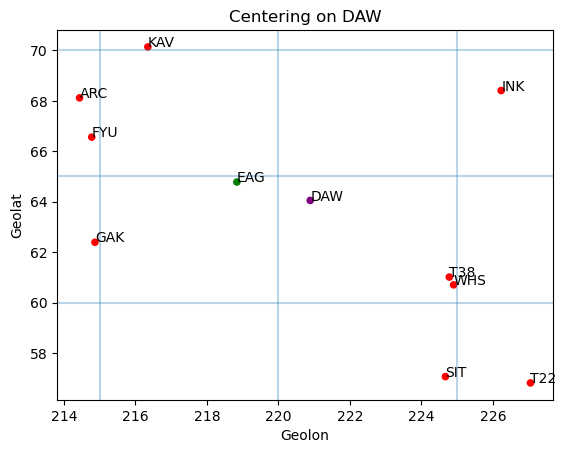

<Figure size 3000x2000 with 0 Axes>

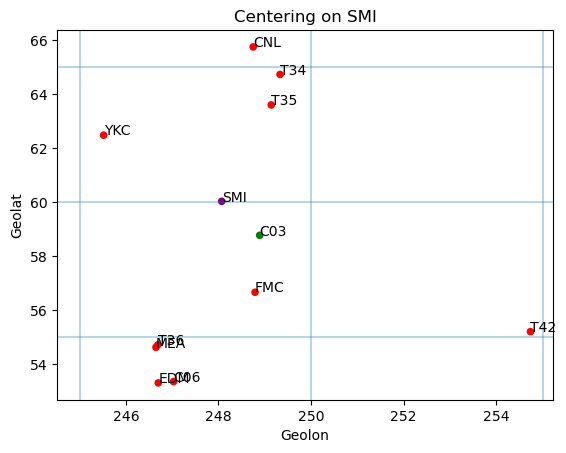

<Figure size 3000x2000 with 0 Axes>

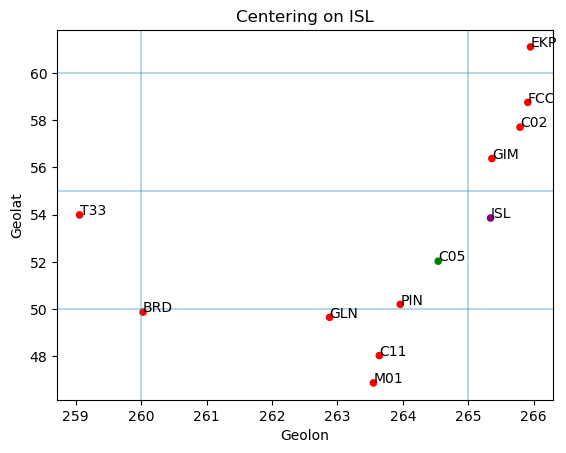

<Figure size 3000x2000 with 0 Axes>

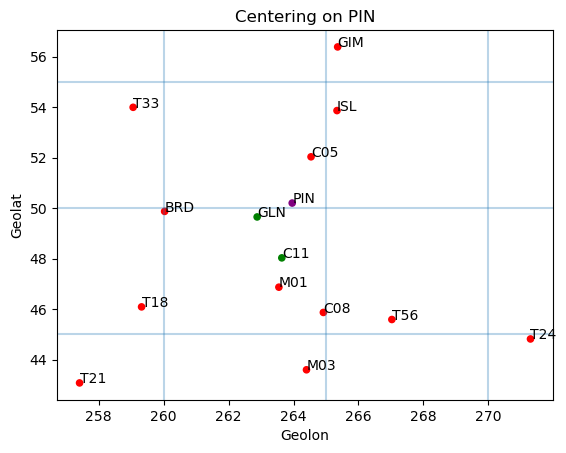

<Figure size 3000x2000 with 0 Axes>

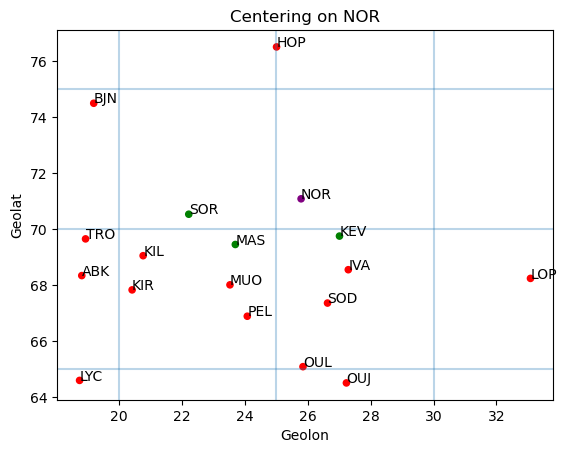

<Figure size 3000x2000 with 0 Axes>

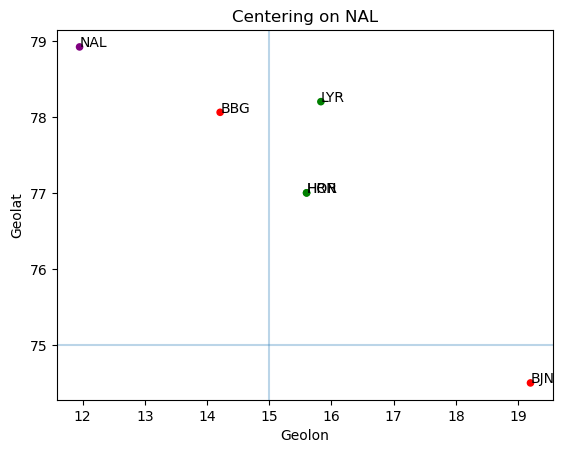

<Figure size 3000x2000 with 0 Axes>

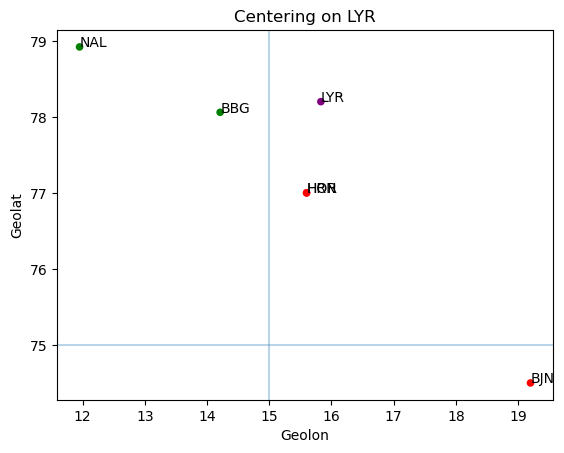

<Figure size 3000x2000 with 0 Axes>

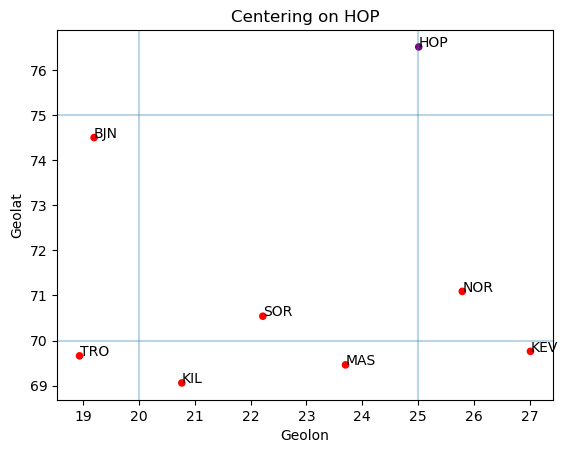

<Figure size 3000x2000 with 0 Axes>

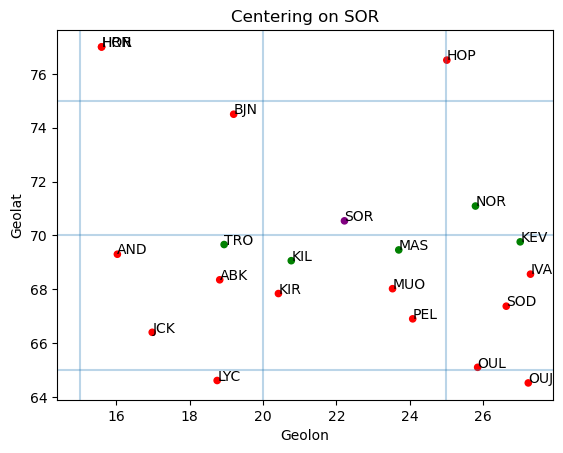

<Figure size 3000x2000 with 0 Axes>

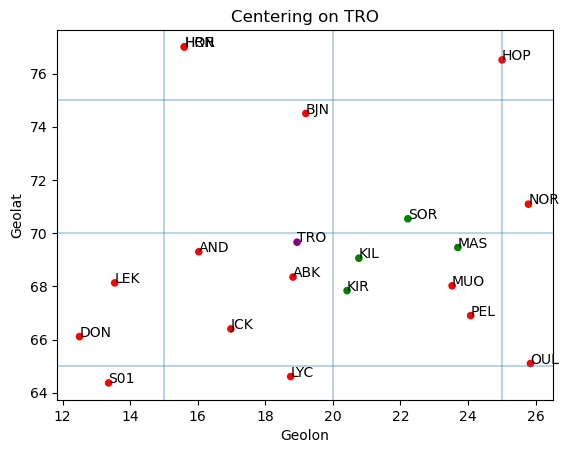

<Figure size 3000x2000 with 0 Axes>

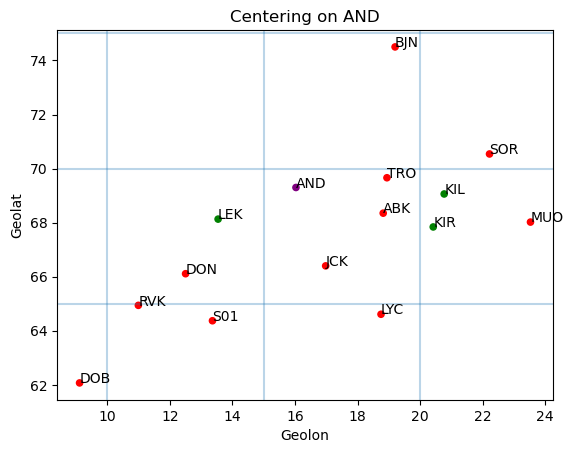

<Figure size 3000x2000 with 0 Axes>

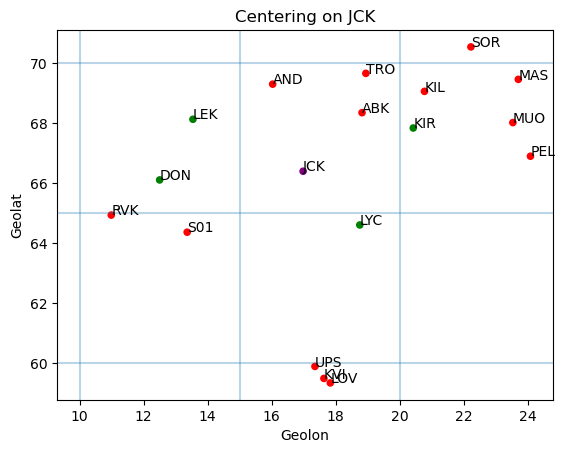

<Figure size 3000x2000 with 0 Axes>

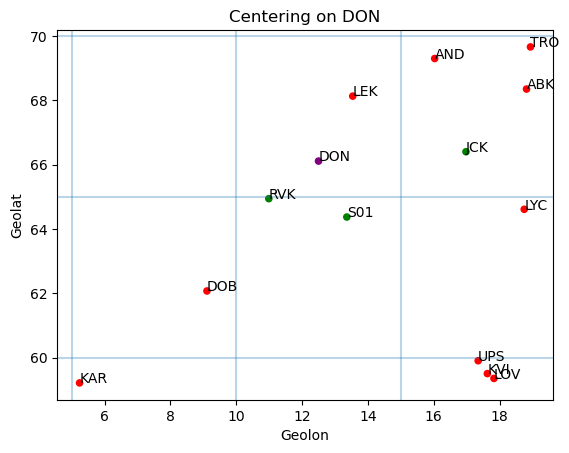

<Figure size 3000x2000 with 0 Axes>

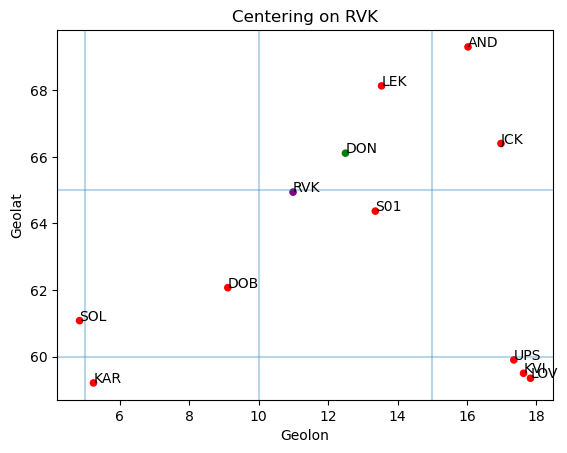

<Figure size 3000x2000 with 0 Axes>

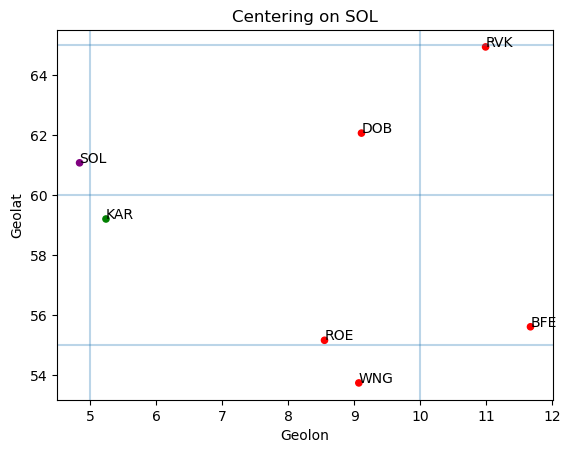

<Figure size 3000x2000 with 0 Axes>

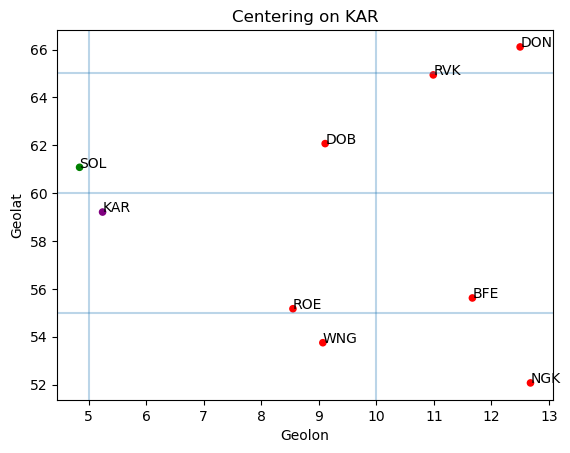

<Figure size 3000x2000 with 0 Axes>

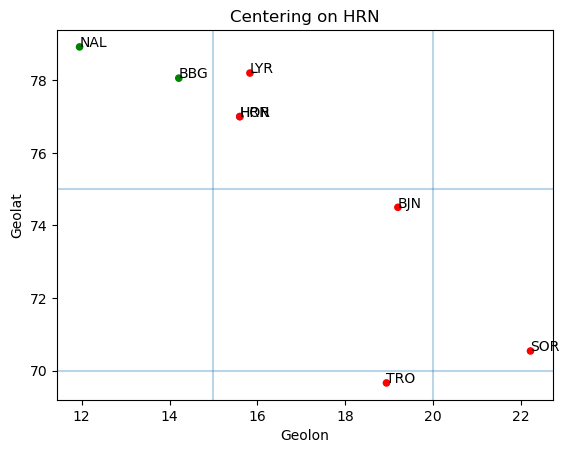

<Figure size 3000x2000 with 0 Axes>

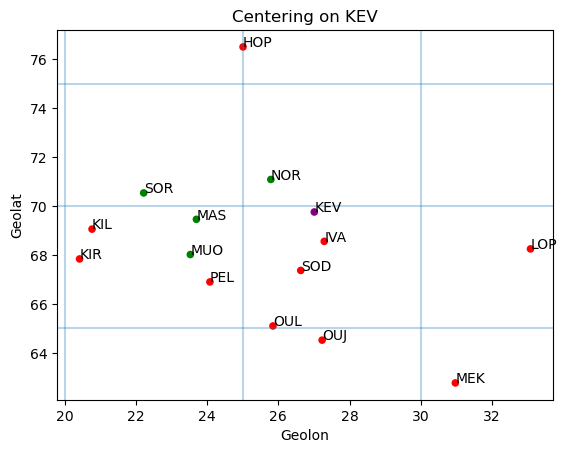

<Figure size 3000x2000 with 0 Axes>

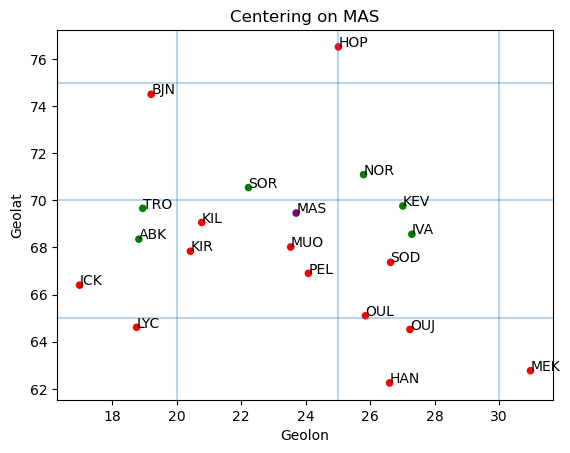

<Figure size 3000x2000 with 0 Axes>

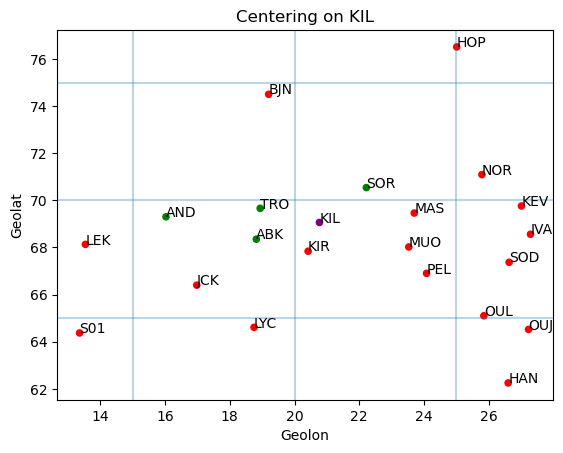

<Figure size 3000x2000 with 0 Axes>

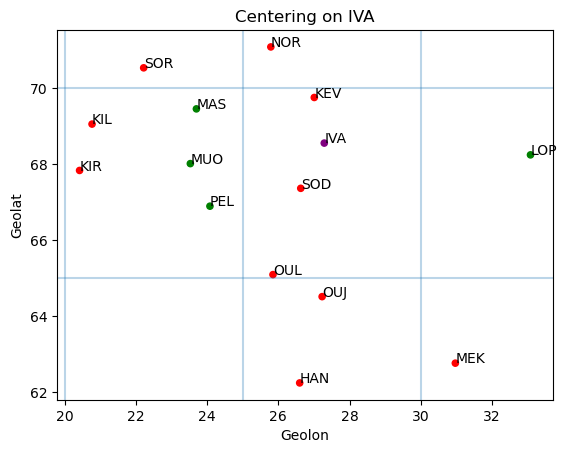

<Figure size 3000x2000 with 0 Axes>

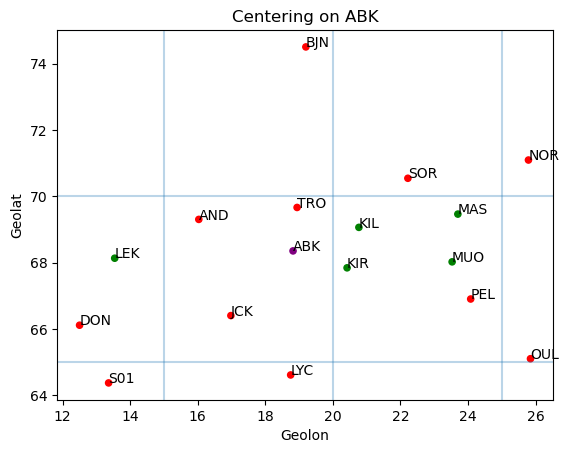

<Figure size 3000x2000 with 0 Axes>

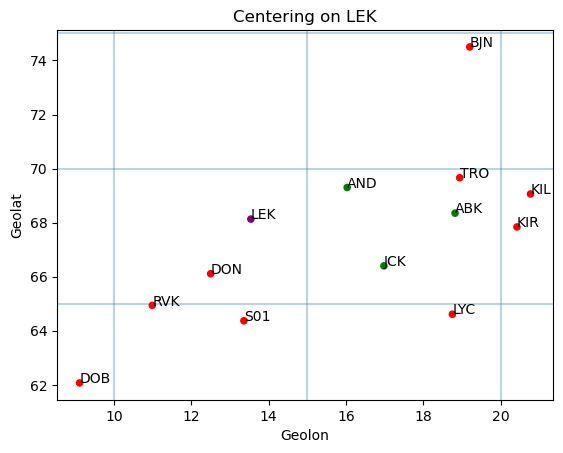

<Figure size 3000x2000 with 0 Axes>

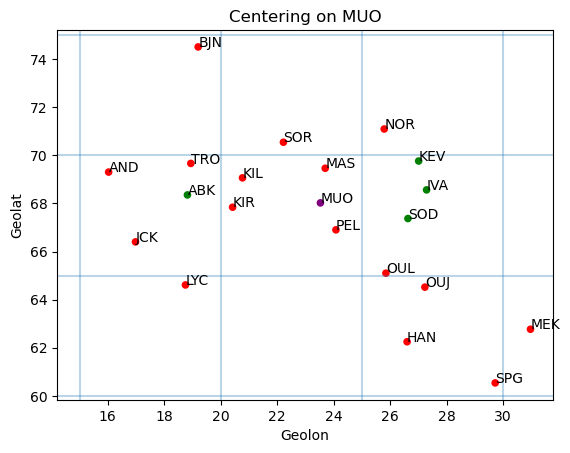

<Figure size 3000x2000 with 0 Axes>

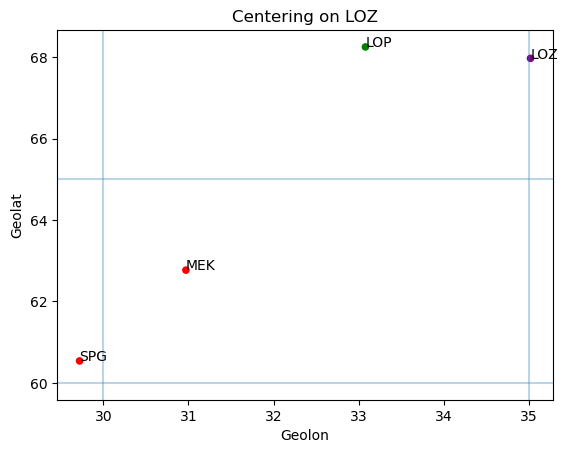

<Figure size 3000x2000 with 0 Axes>

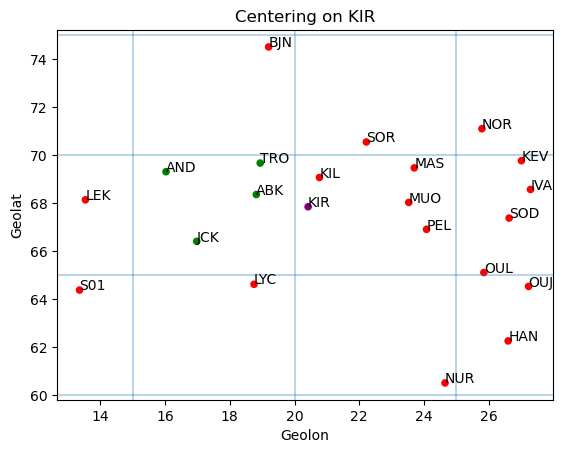

<Figure size 3000x2000 with 0 Axes>

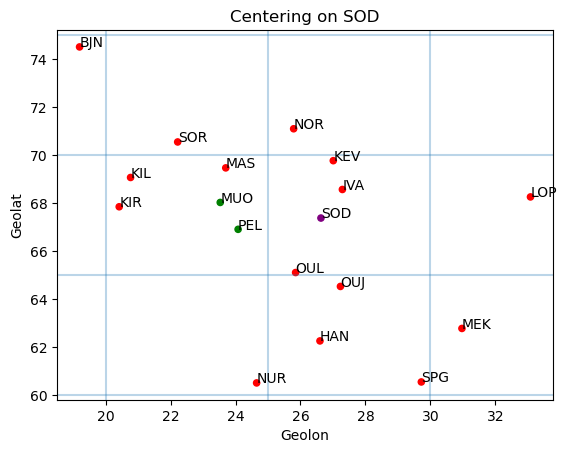

<Figure size 3000x2000 with 0 Axes>

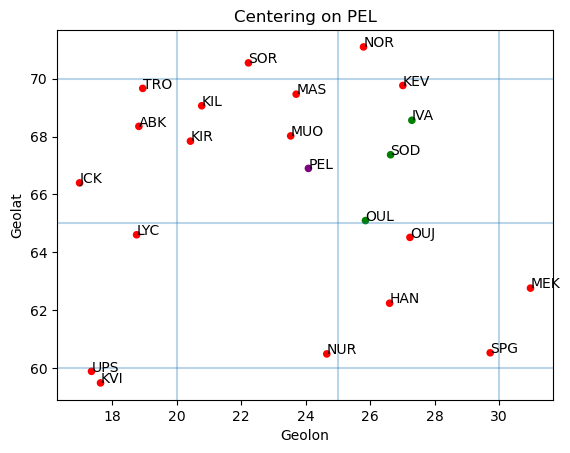

<Figure size 3000x2000 with 0 Axes>

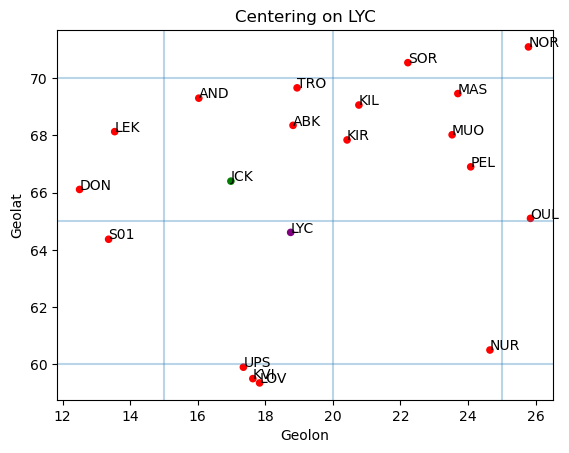

<Figure size 3000x2000 with 0 Axes>

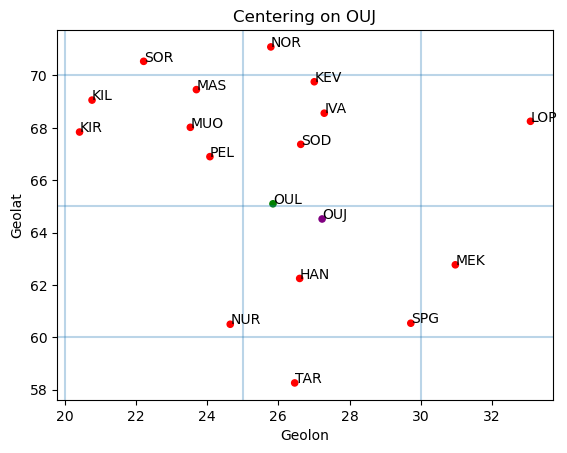

<Figure size 3000x2000 with 0 Axes>

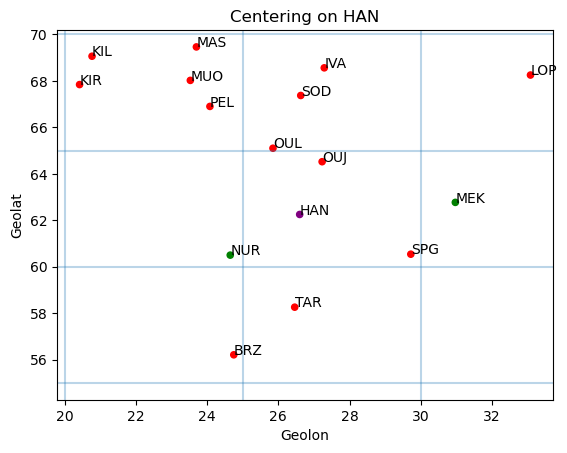

<Figure size 3000x2000 with 0 Axes>

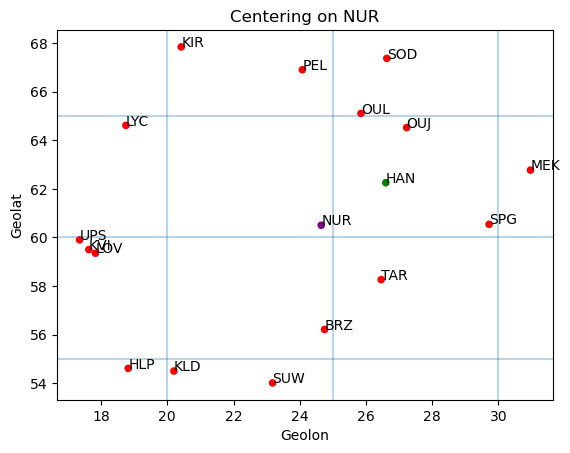

<Figure size 3000x2000 with 0 Axes>

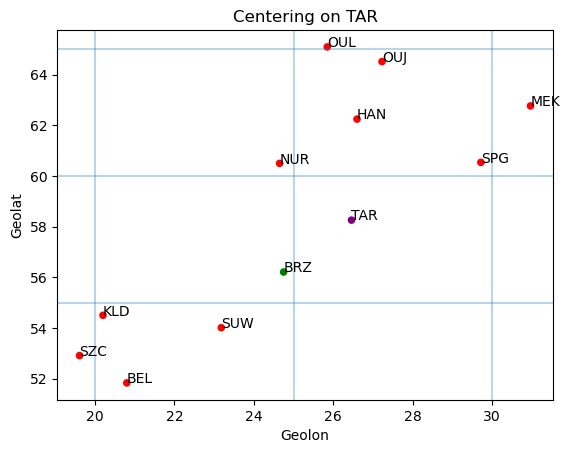

<Figure size 3000x2000 with 0 Axes>

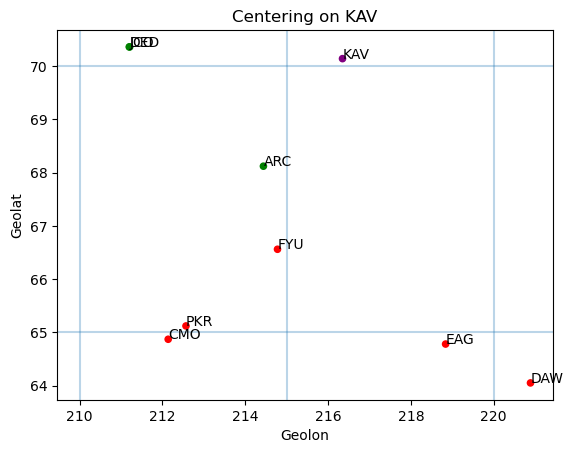

<Figure size 3000x2000 with 0 Axes>

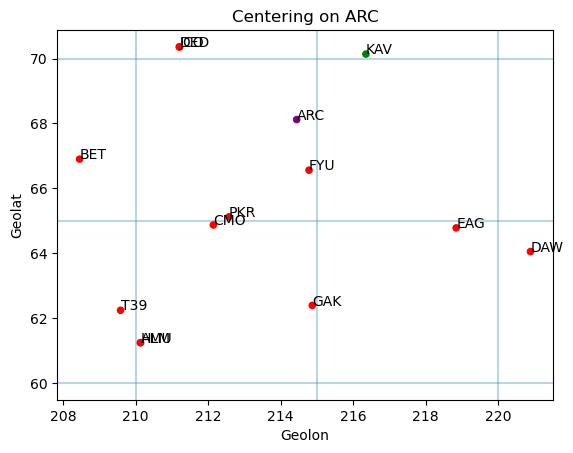

<Figure size 3000x2000 with 0 Axes>

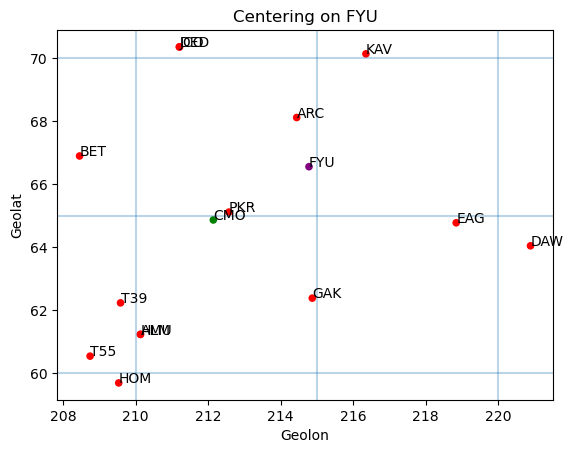

<Figure size 3000x2000 with 0 Axes>

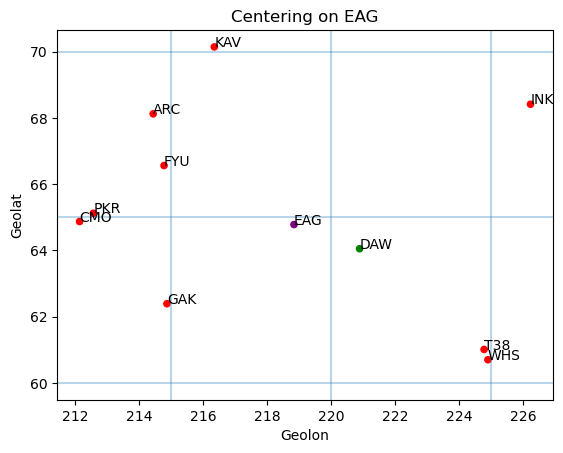

<Figure size 3000x2000 with 0 Axes>

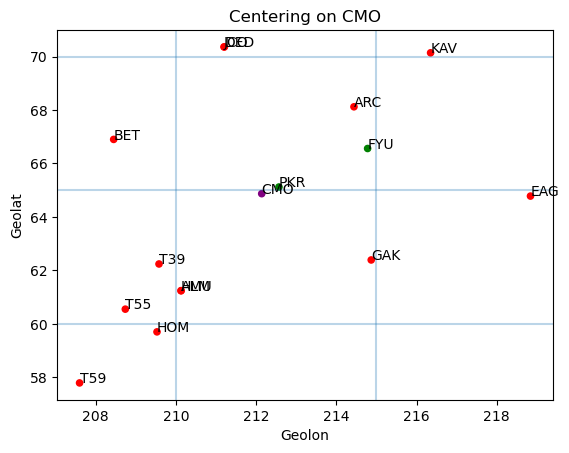

<Figure size 3000x2000 with 0 Axes>

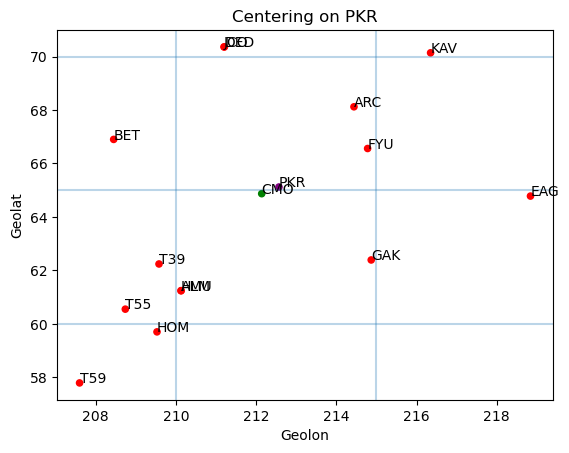

<Figure size 3000x2000 with 0 Axes>

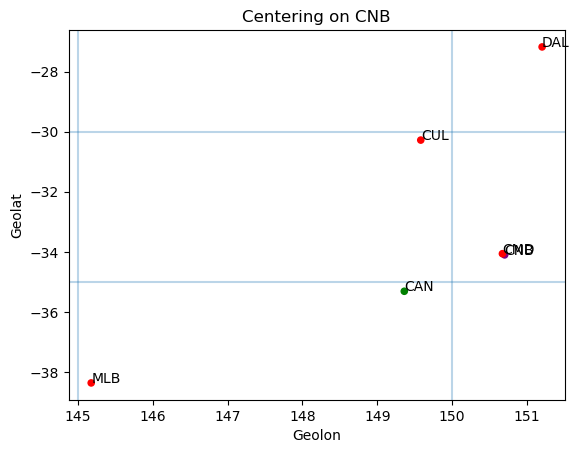

<Figure size 3000x2000 with 0 Axes>

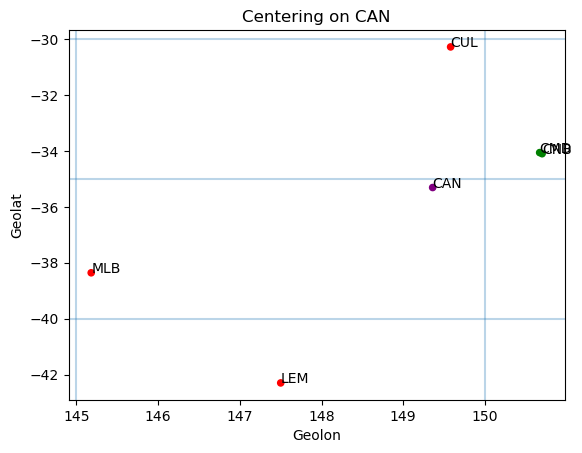

<Figure size 3000x2000 with 0 Axes>

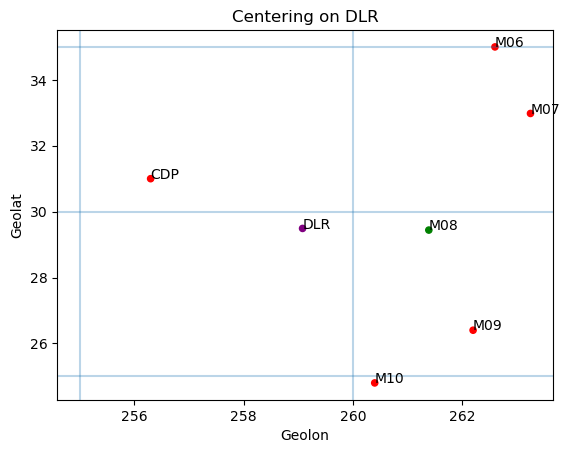

<Figure size 3000x2000 with 0 Axes>

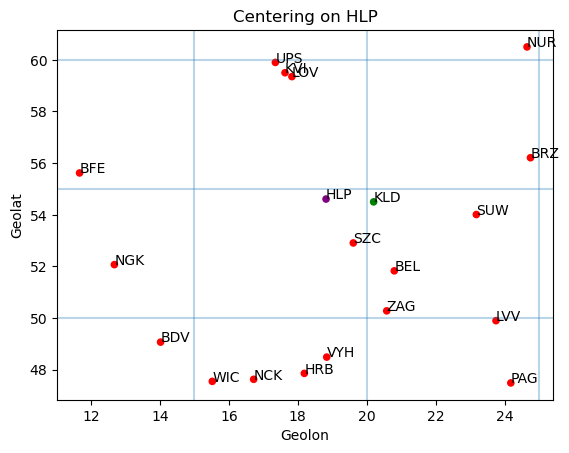

<Figure size 3000x2000 with 0 Axes>

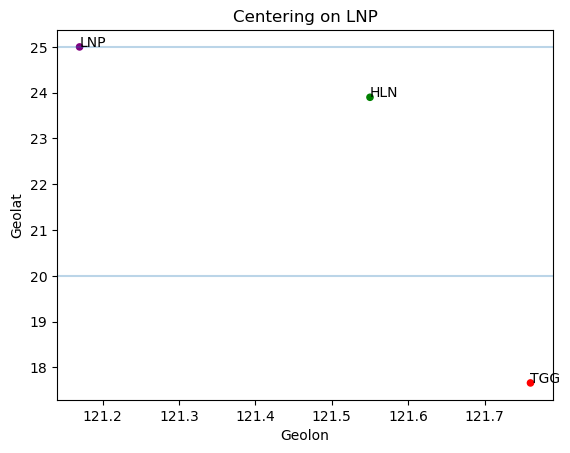

<Figure size 3000x2000 with 0 Axes>

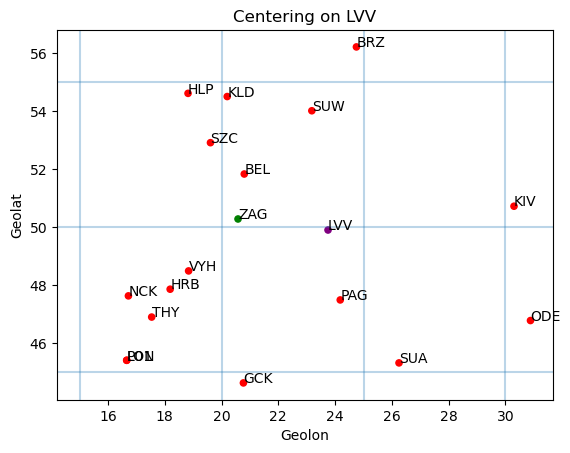

<Figure size 3000x2000 with 0 Axes>

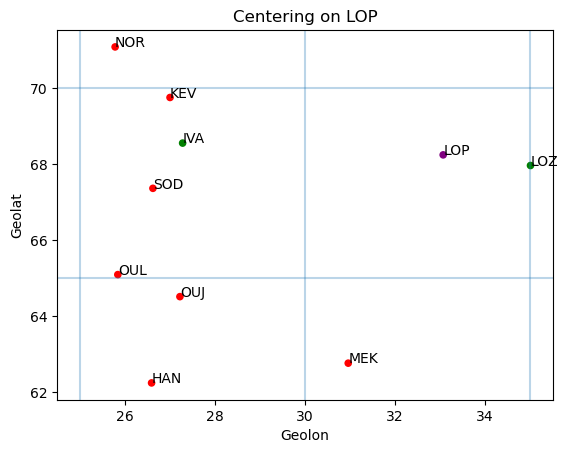

<Figure size 3000x2000 with 0 Axes>

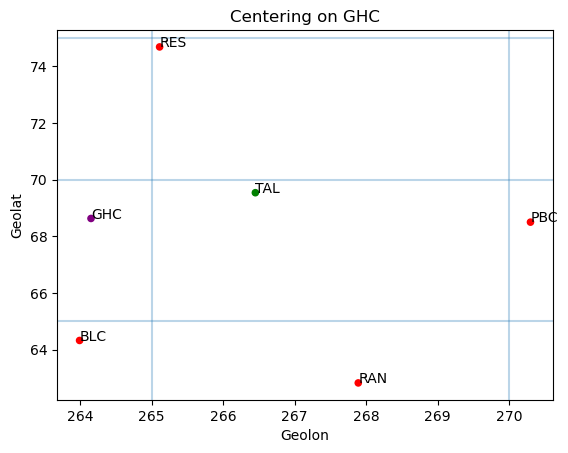

<Figure size 3000x2000 with 0 Axes>

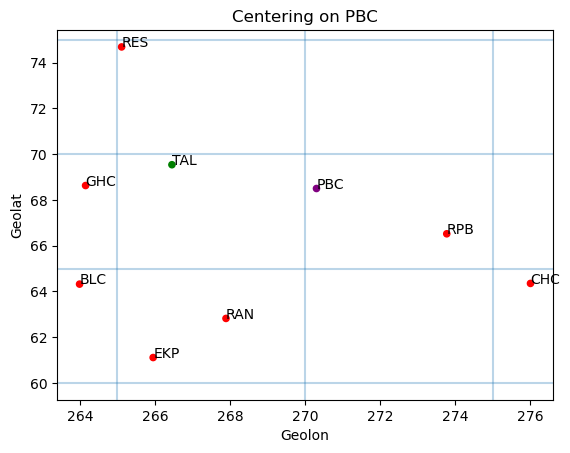

<Figure size 3000x2000 with 0 Axes>

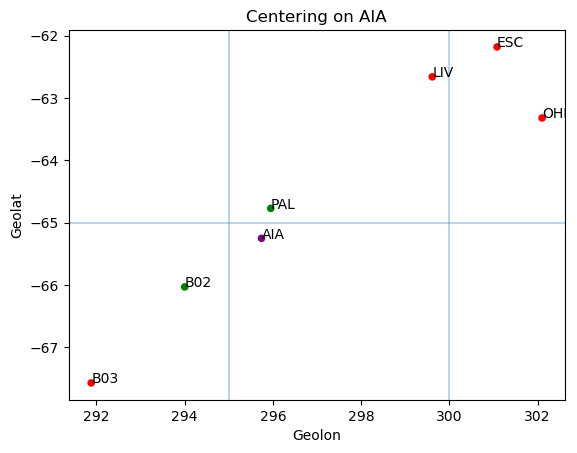

<Figure size 3000x2000 with 0 Axes>

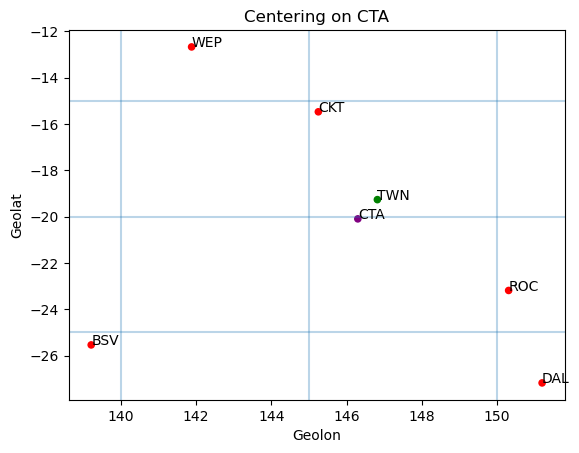

<Figure size 3000x2000 with 0 Axes>

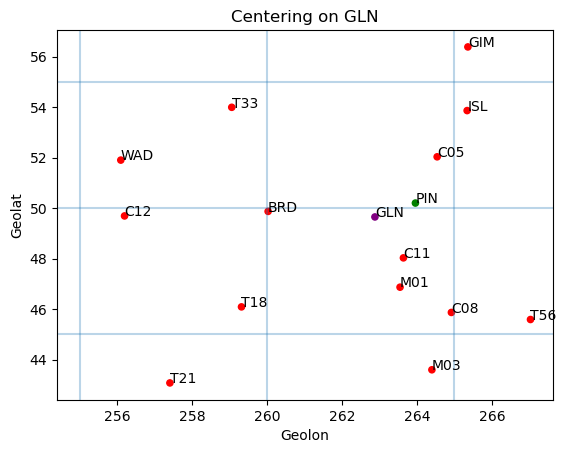

<Figure size 3000x2000 with 0 Axes>

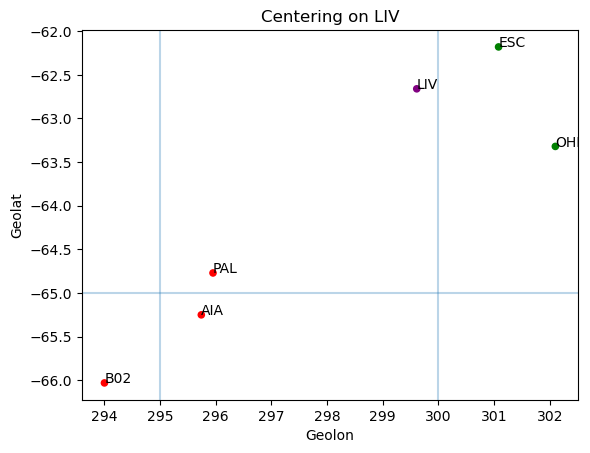

<Figure size 3000x2000 with 0 Axes>

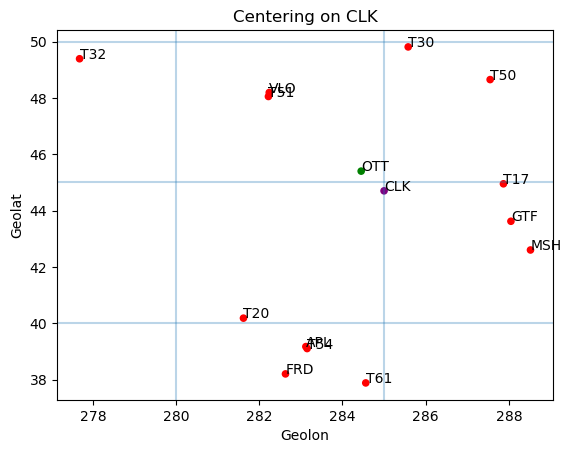

<Figure size 3000x2000 with 0 Axes>

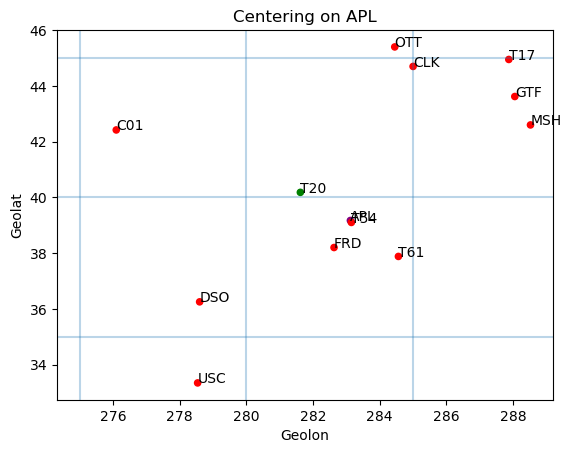

<Figure size 3000x2000 with 0 Axes>

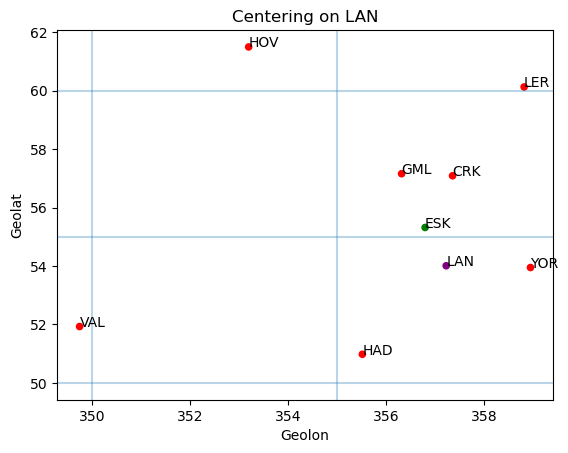

<Figure size 3000x2000 with 0 Axes>

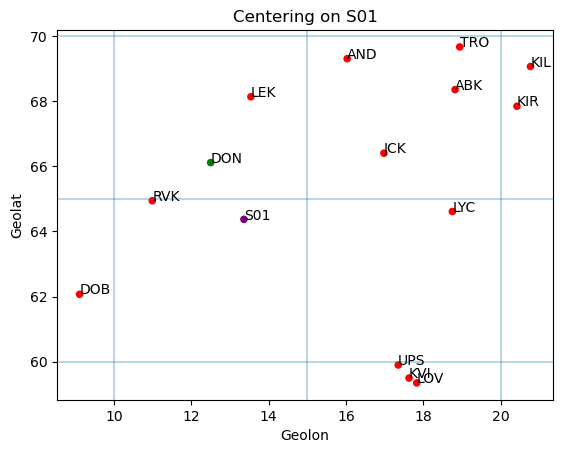

<Figure size 3000x2000 with 0 Axes>

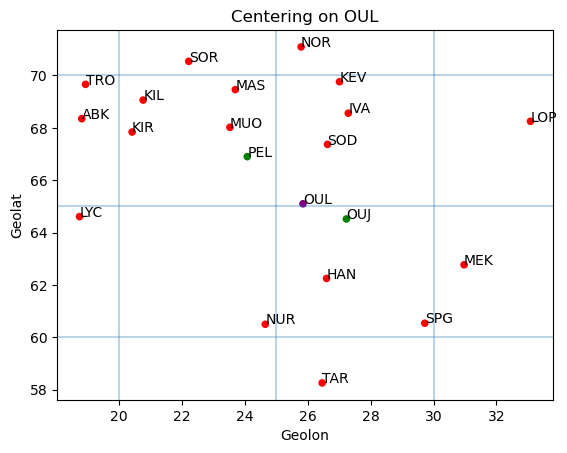

<Figure size 3000x2000 with 0 Axes>

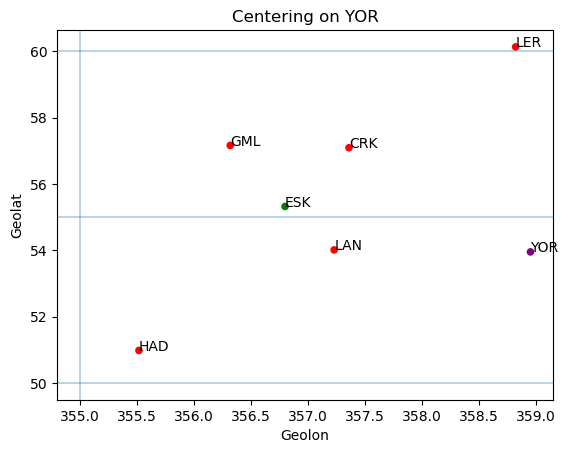

<Figure size 3000x2000 with 0 Axes>

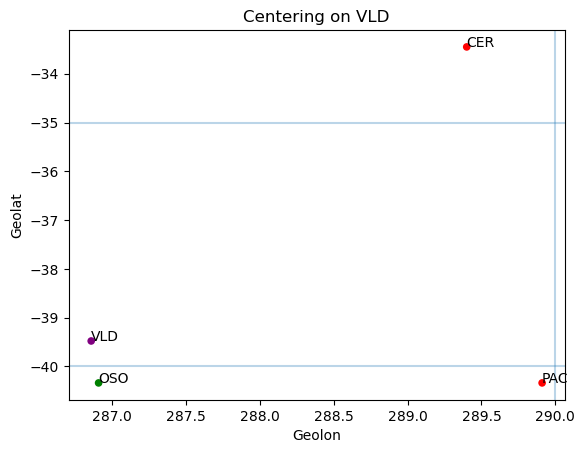

<Figure size 3000x2000 with 0 Axes>

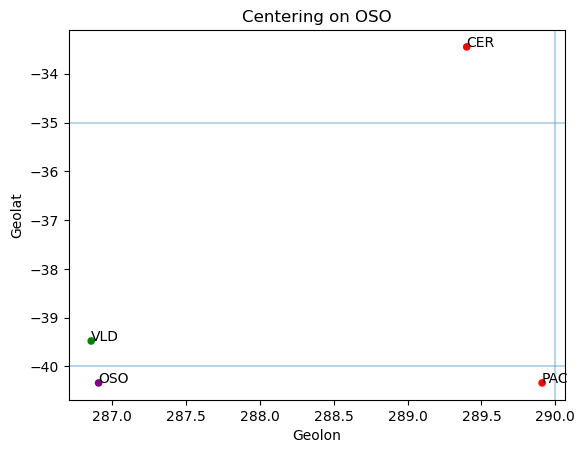

<Figure size 3000x2000 with 0 Axes>

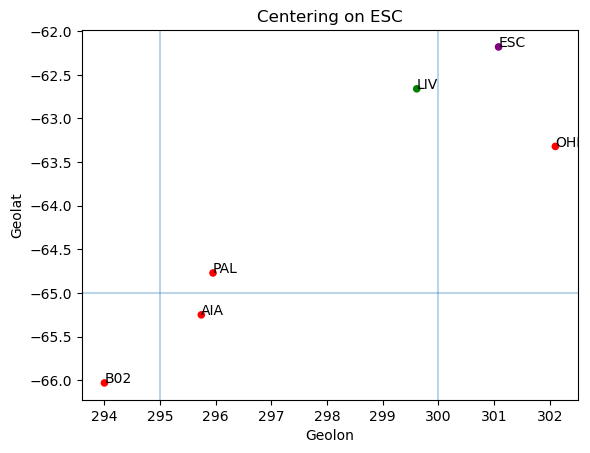

<Figure size 3000x2000 with 0 Axes>

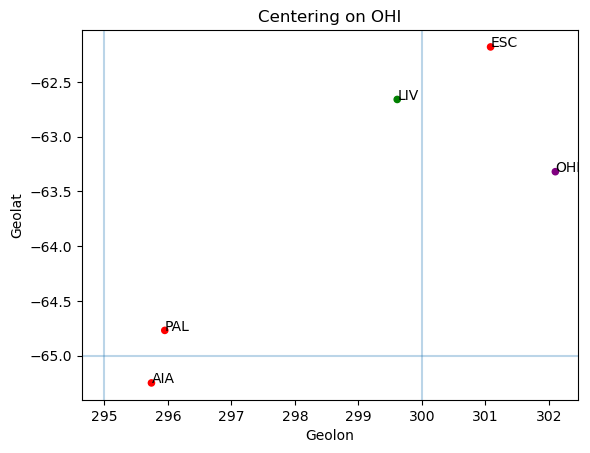

<Figure size 3000x2000 with 0 Axes>

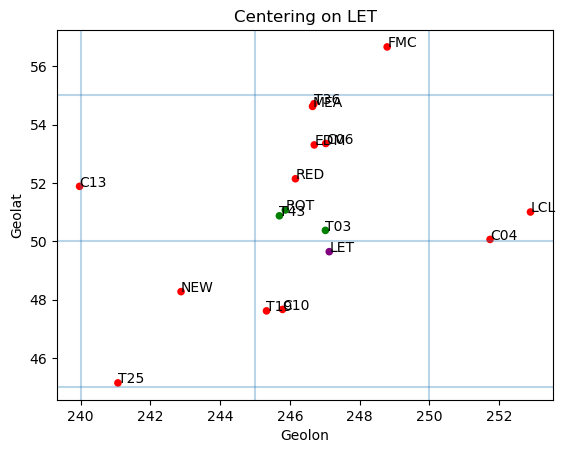

<Figure size 3000x2000 with 0 Axes>

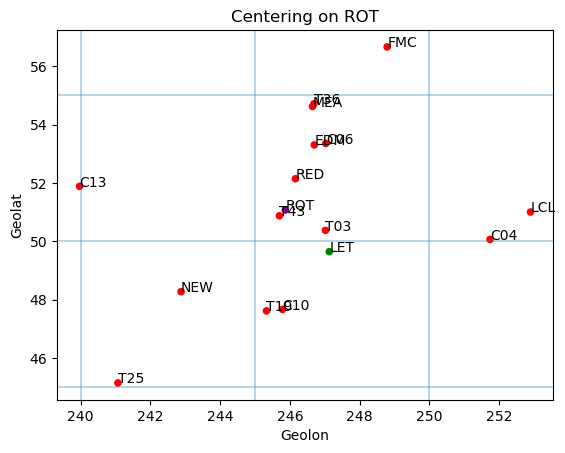

<Figure size 3000x2000 with 0 Axes>

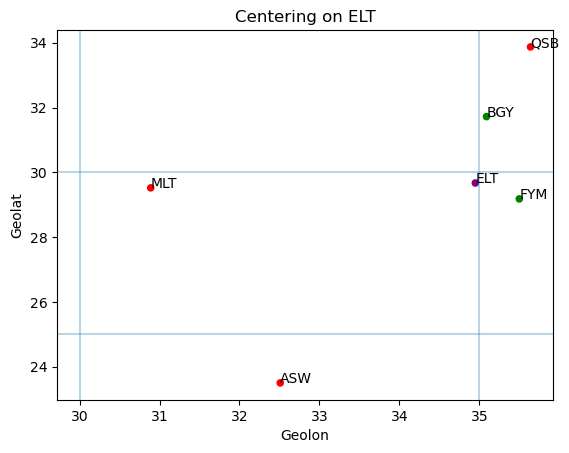

<Figure size 3000x2000 with 0 Axes>

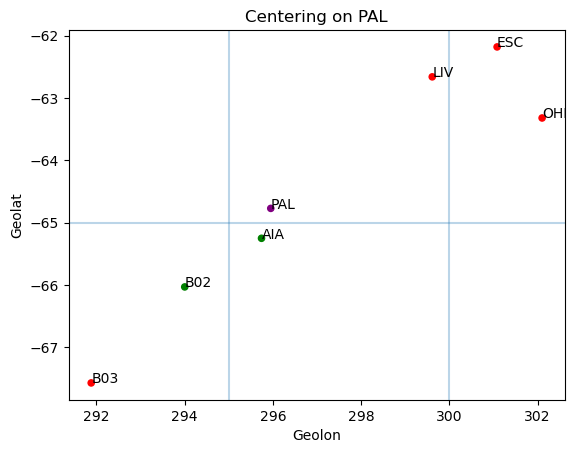

<Figure size 3000x2000 with 0 Axes>

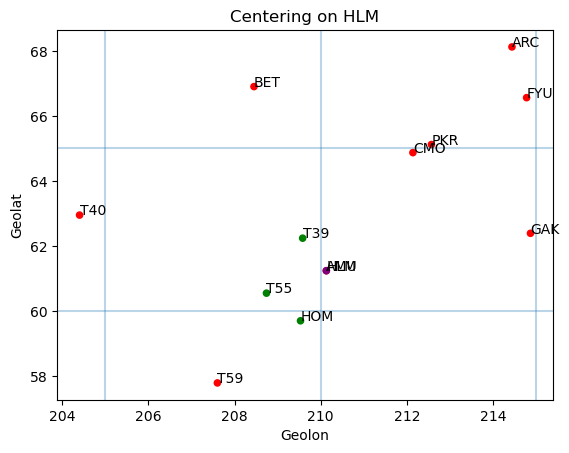

<Figure size 3000x2000 with 0 Axes>

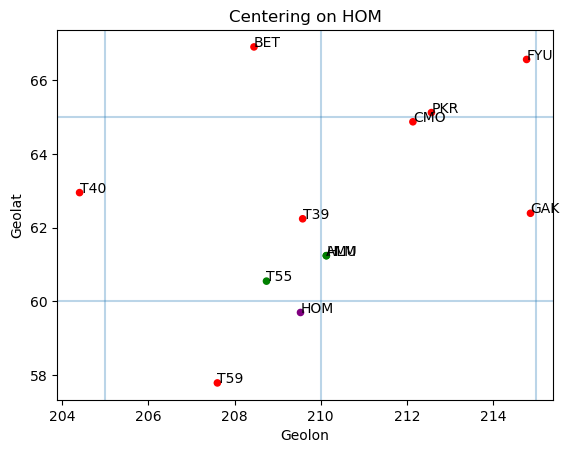

<Figure size 3000x2000 with 0 Axes>

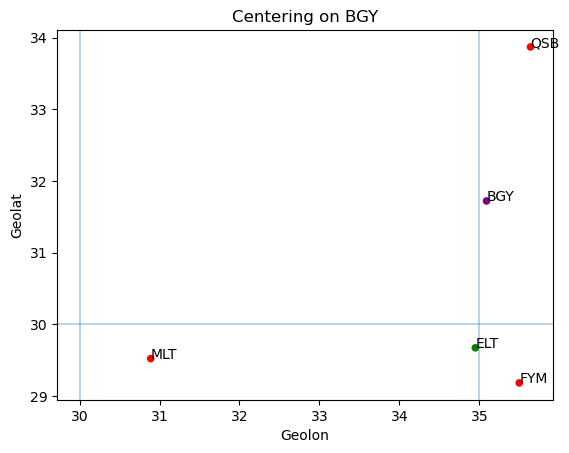

<Figure size 3000x2000 with 0 Axes>

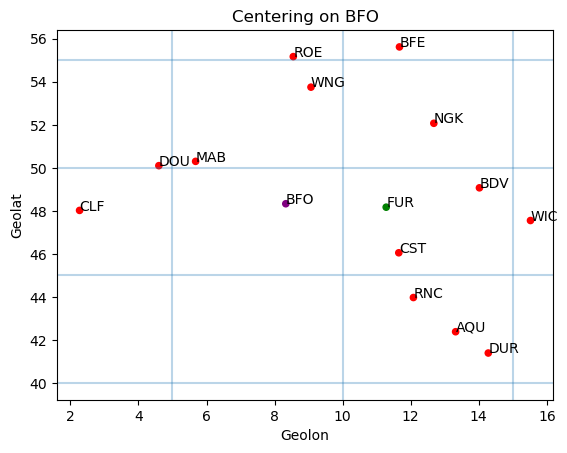

<Figure size 3000x2000 with 0 Axes>

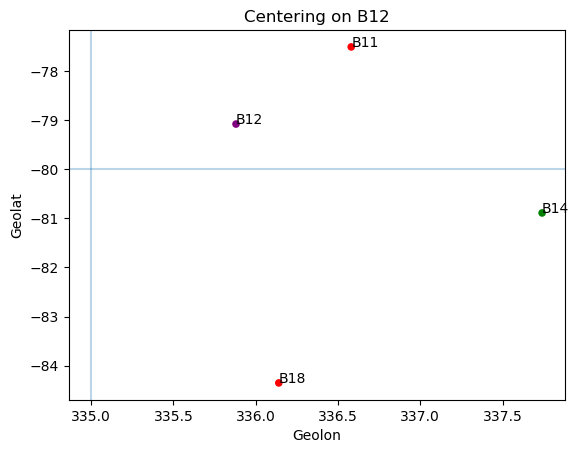

<Figure size 3000x2000 with 0 Axes>

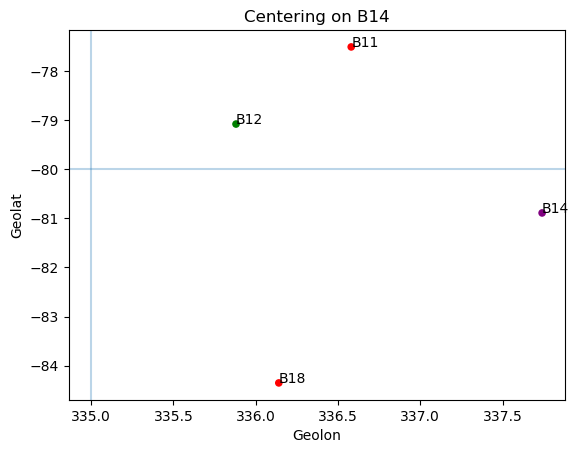

<Figure size 3000x2000 with 0 Axes>

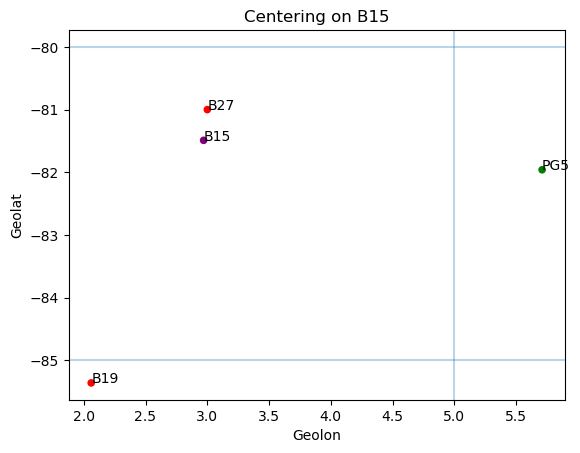

<Figure size 3000x2000 with 0 Axes>

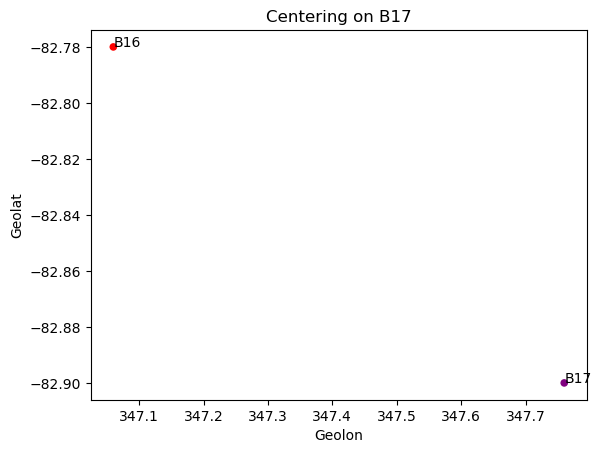

<Figure size 3000x2000 with 0 Axes>

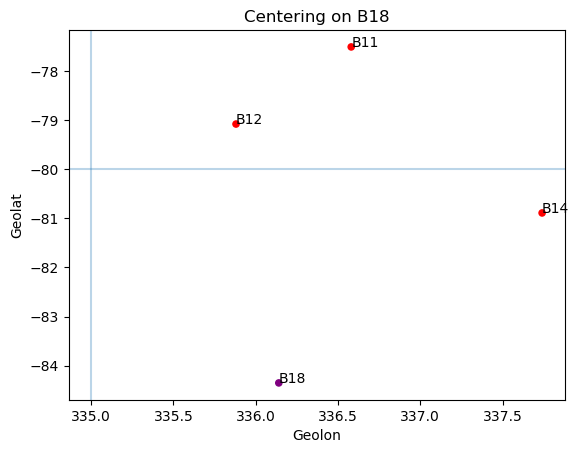

<Figure size 3000x2000 with 0 Axes>

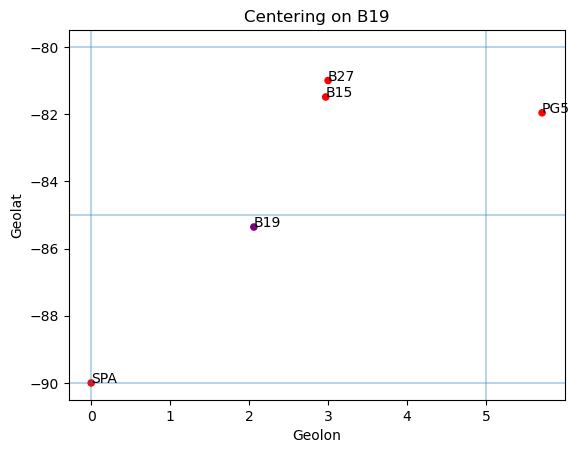

<Figure size 3000x2000 with 0 Axes>

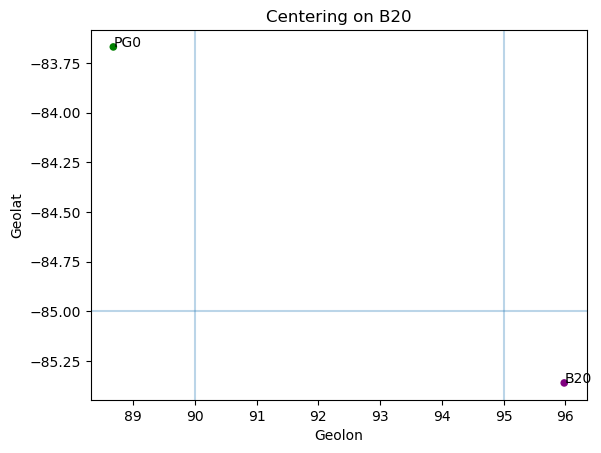

<Figure size 3000x2000 with 0 Axes>

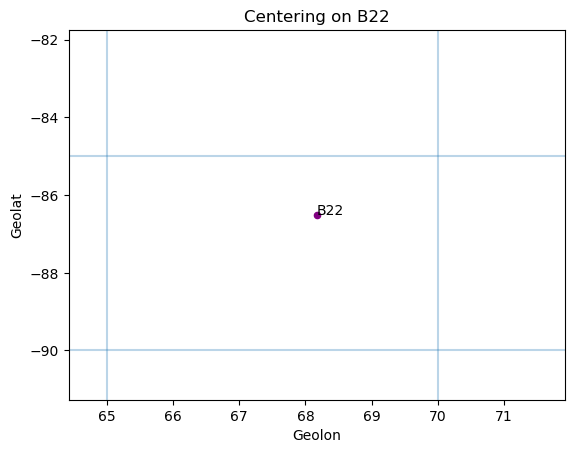

<Figure size 3000x2000 with 0 Axes>

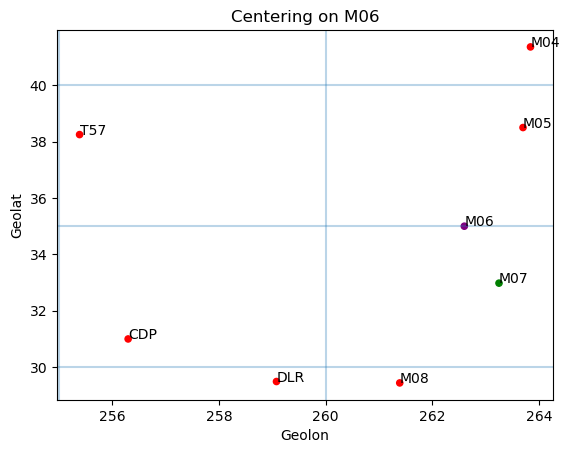

<Figure size 3000x2000 with 0 Axes>

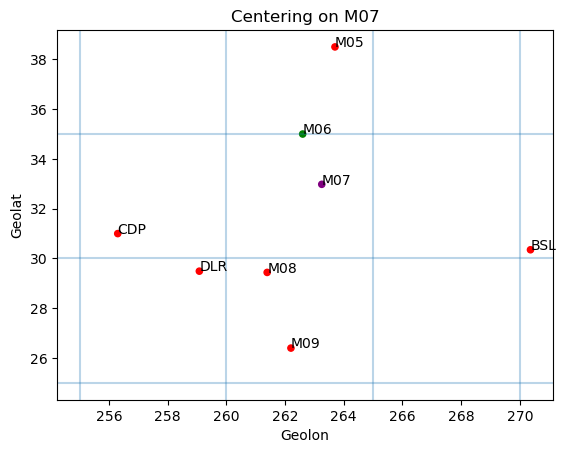

<Figure size 3000x2000 with 0 Axes>

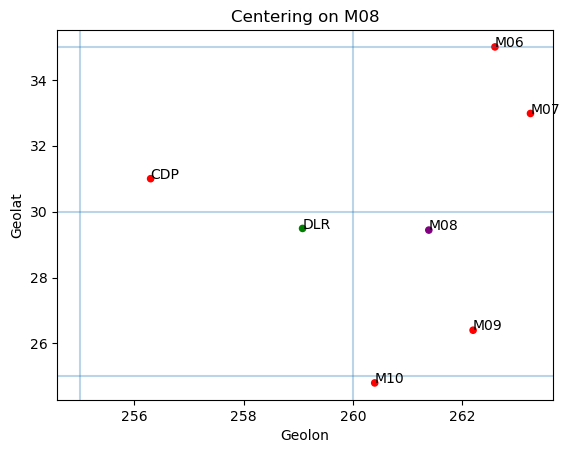

<Figure size 3000x2000 with 0 Axes>

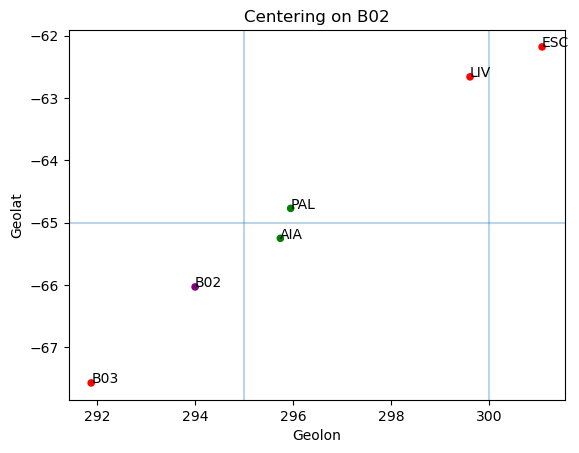

<Figure size 3000x2000 with 0 Axes>

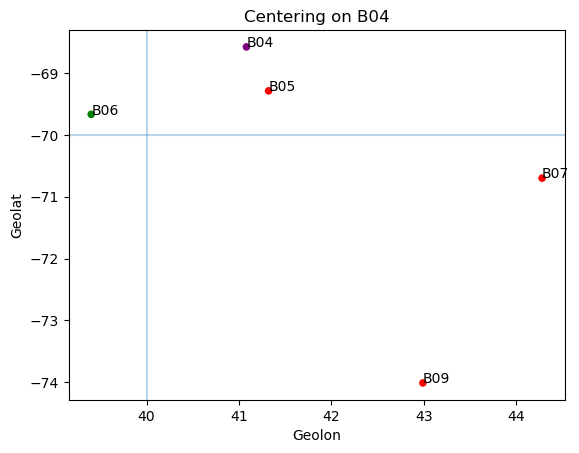

<Figure size 3000x2000 with 0 Axes>

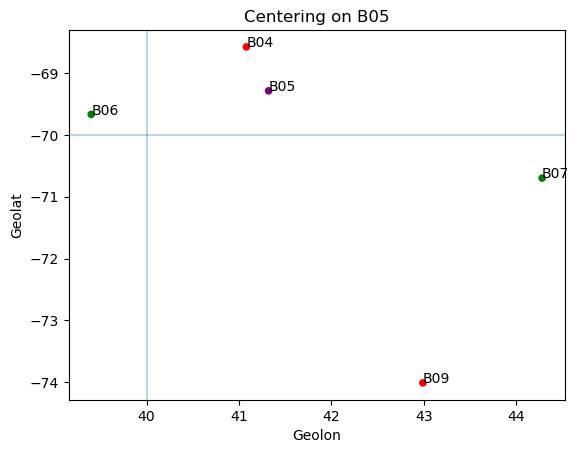

<Figure size 3000x2000 with 0 Axes>

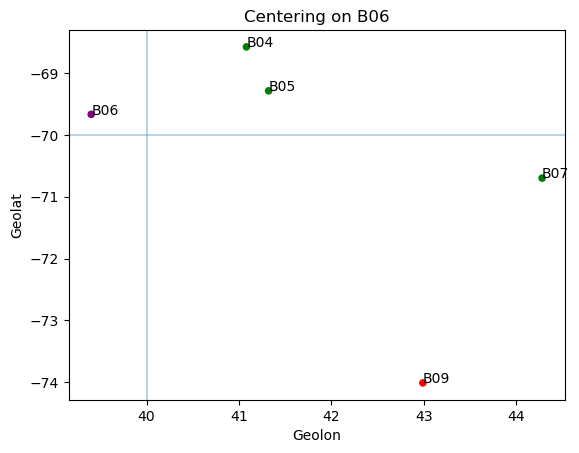

<Figure size 3000x2000 with 0 Axes>

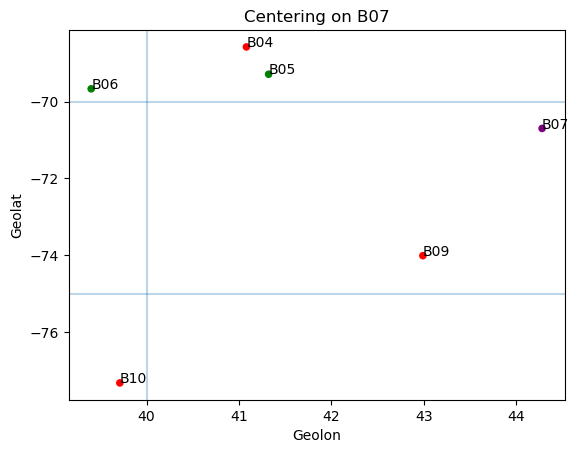

<Figure size 3000x2000 with 0 Axes>

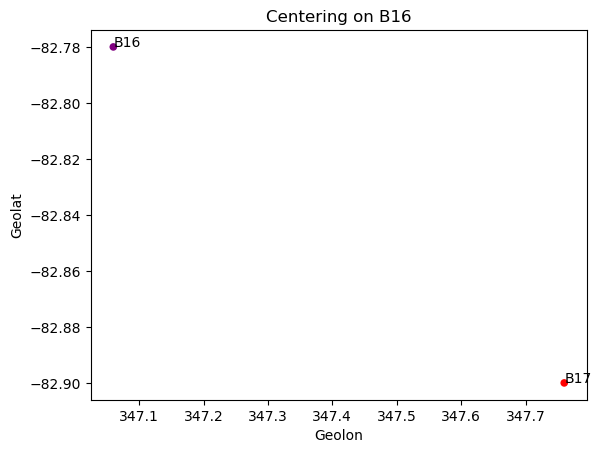

<Figure size 3000x2000 with 0 Axes>

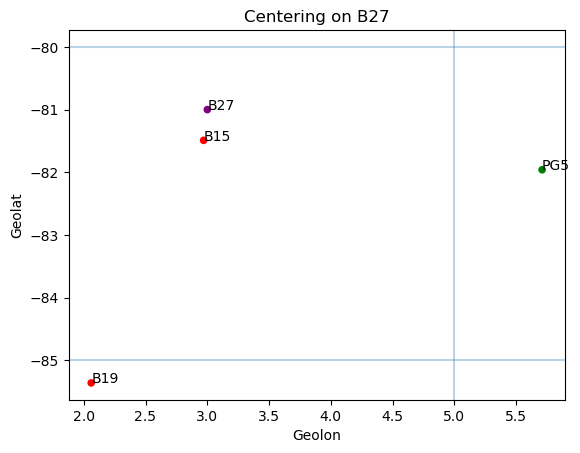

<Figure size 3000x2000 with 0 Axes>

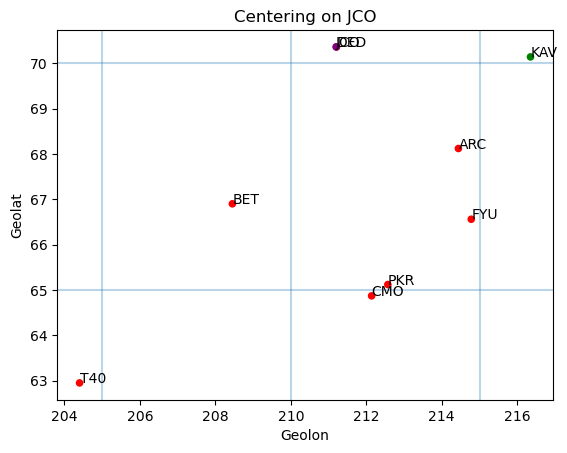

<Figure size 3000x2000 with 0 Axes>

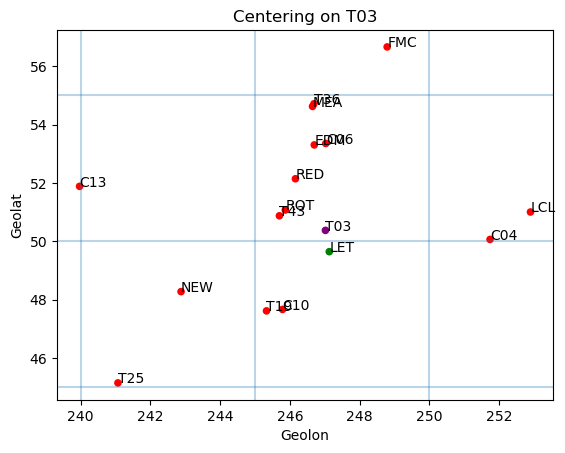

<Figure size 3000x2000 with 0 Axes>

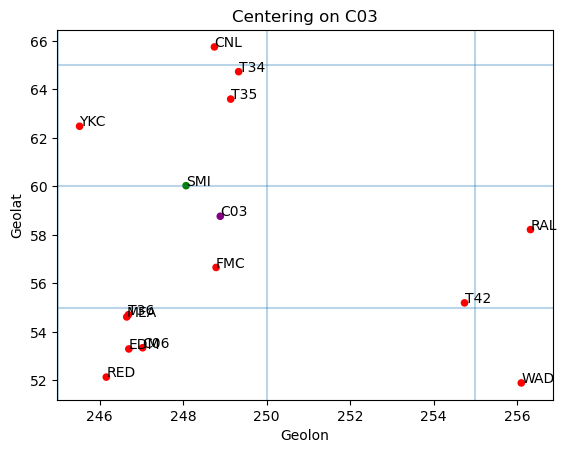

<Figure size 3000x2000 with 0 Axes>

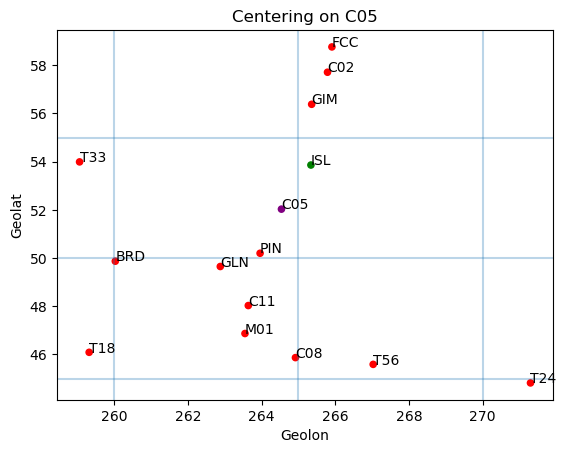

<Figure size 3000x2000 with 0 Axes>

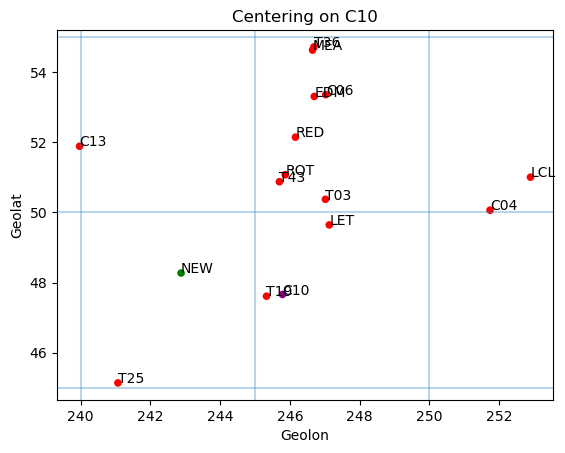

<Figure size 3000x2000 with 0 Axes>

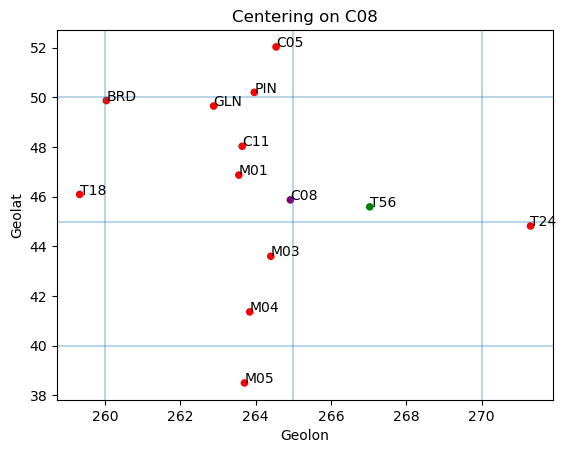

<Figure size 3000x2000 with 0 Axes>

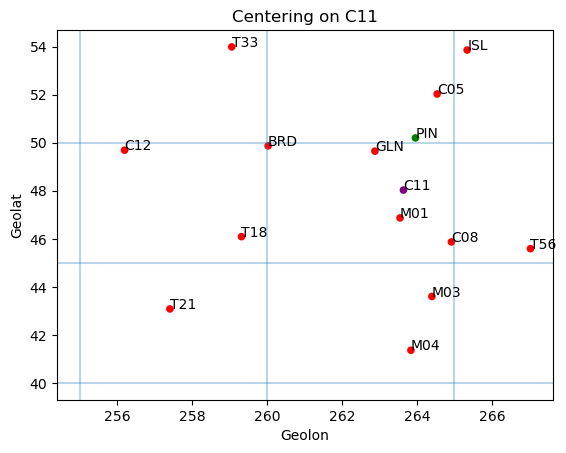

<Figure size 3000x2000 with 0 Axes>

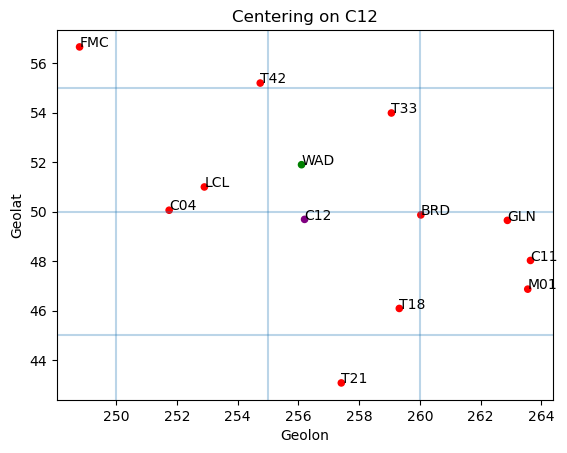

<Figure size 3000x2000 with 0 Axes>

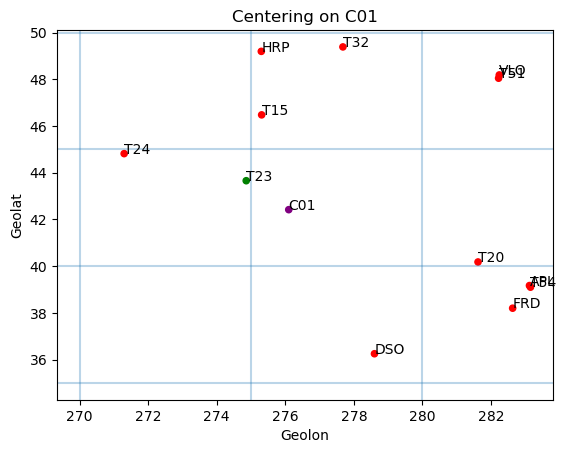

<Figure size 3000x2000 with 0 Axes>

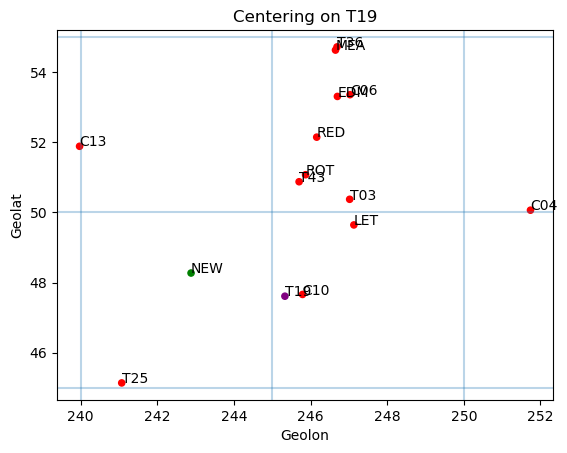

<Figure size 3000x2000 with 0 Axes>

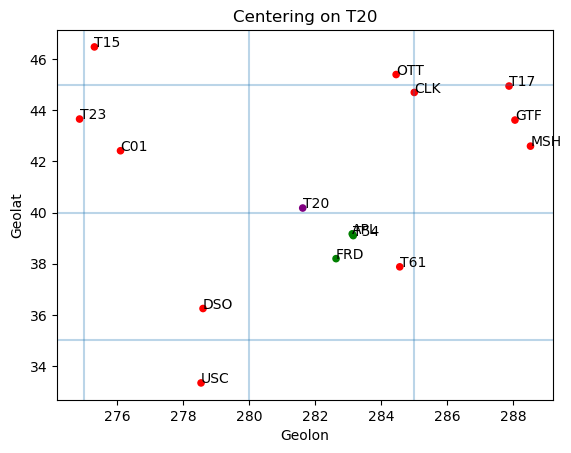

<Figure size 3000x2000 with 0 Axes>

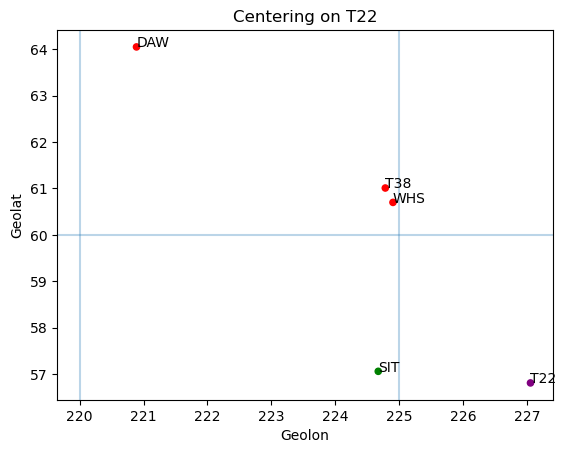

<Figure size 3000x2000 with 0 Axes>

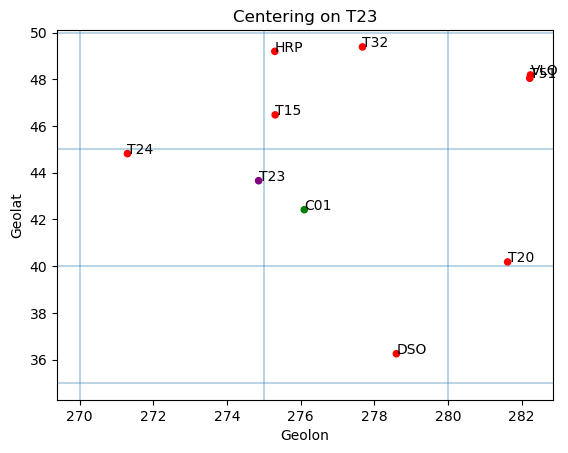

<Figure size 3000x2000 with 0 Axes>

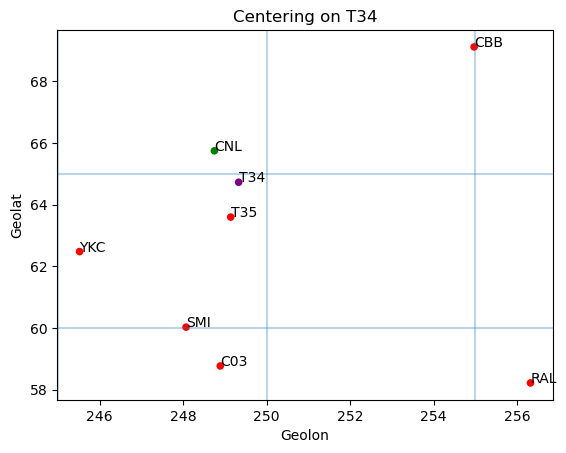

<Figure size 3000x2000 with 0 Axes>

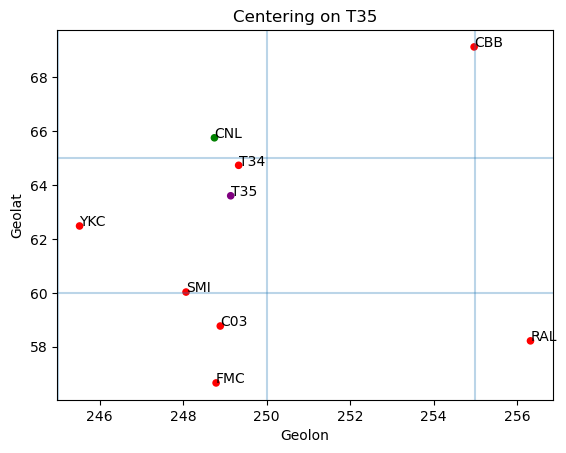

<Figure size 3000x2000 with 0 Axes>

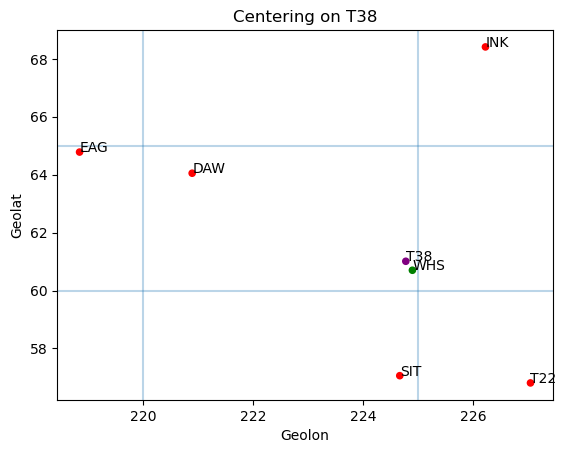

<Figure size 3000x2000 with 0 Axes>

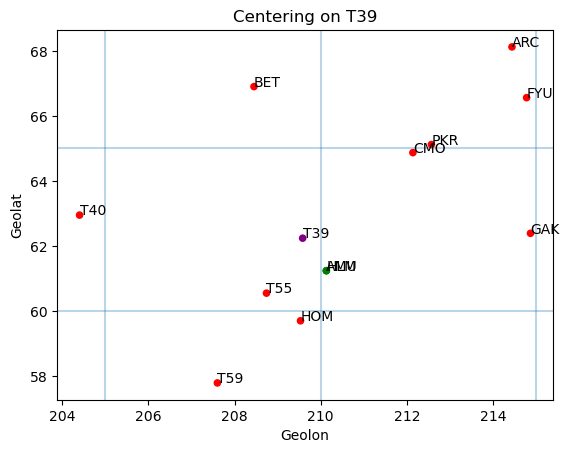

<Figure size 3000x2000 with 0 Axes>

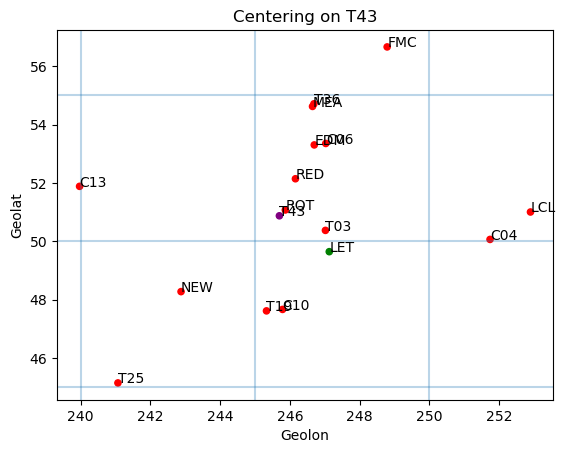

<Figure size 3000x2000 with 0 Axes>

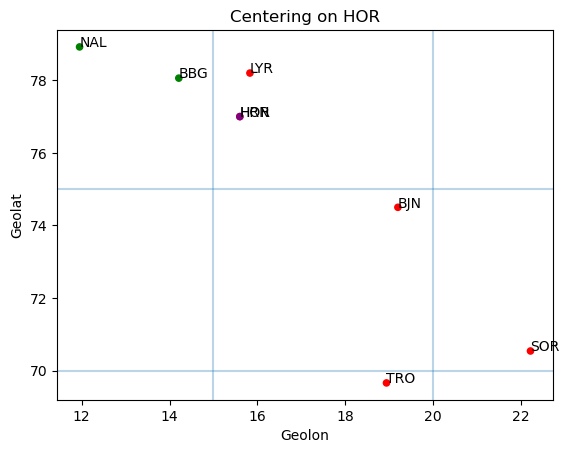

<Figure size 3000x2000 with 0 Axes>

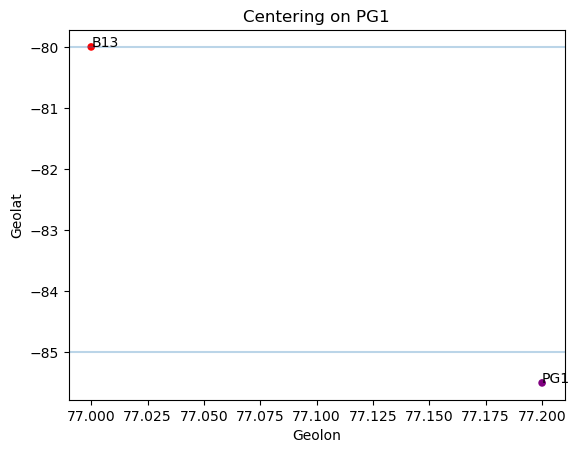

<Figure size 3000x2000 with 0 Axes>

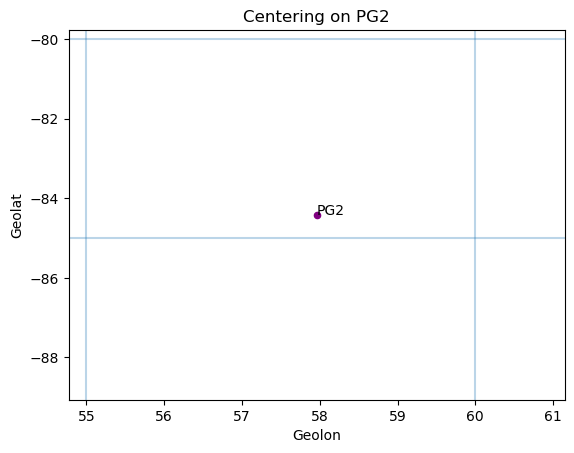

<Figure size 3000x2000 with 0 Axes>

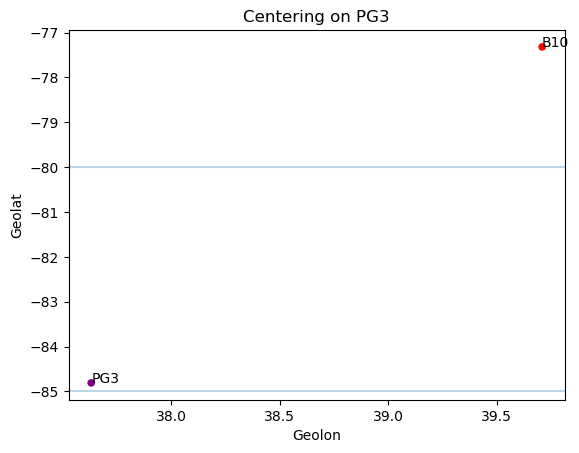

<Figure size 3000x2000 with 0 Axes>

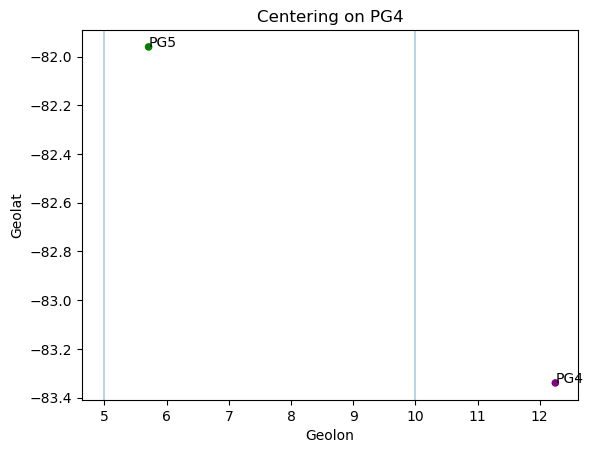

<Figure size 3000x2000 with 0 Axes>

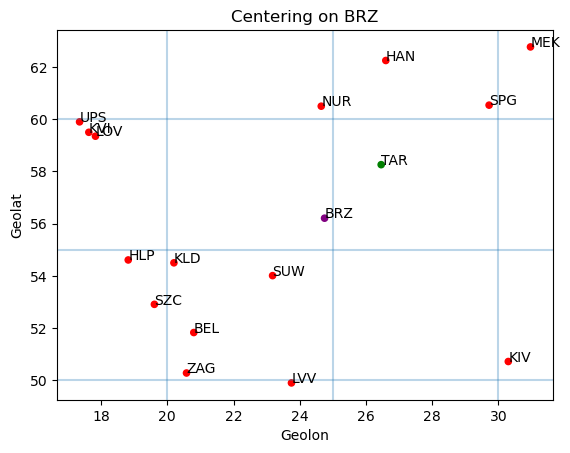

<Figure size 3000x2000 with 0 Axes>

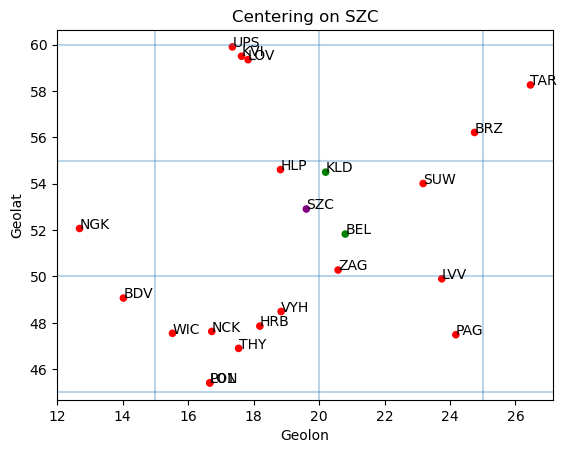

<Figure size 3000x2000 with 0 Axes>

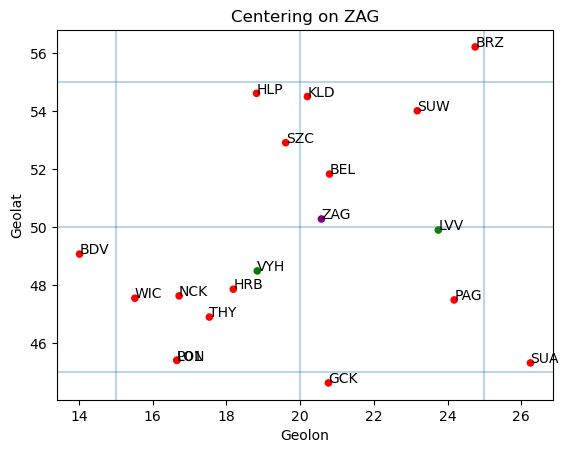

<Figure size 3000x2000 with 0 Axes>

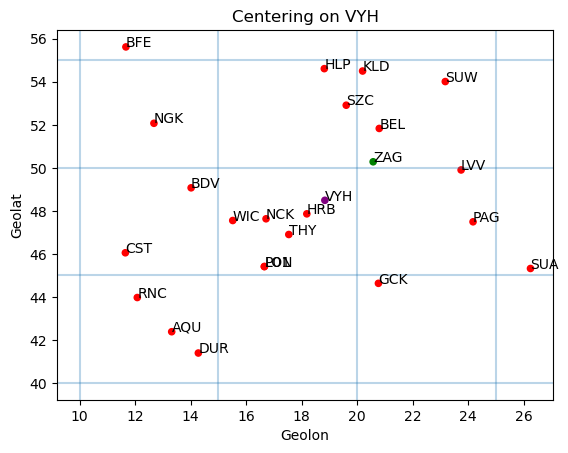

<Figure size 3000x2000 with 0 Axes>

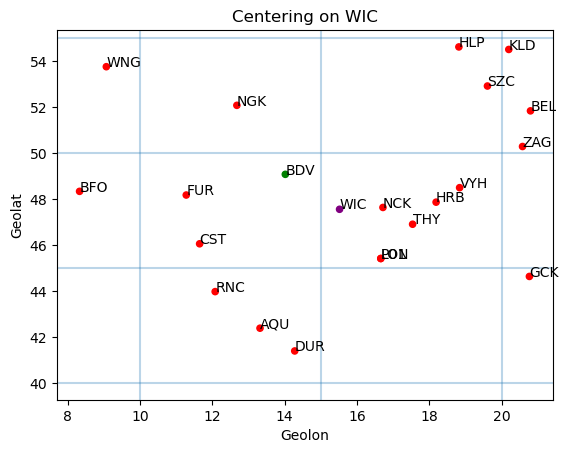

<Figure size 3000x2000 with 0 Axes>

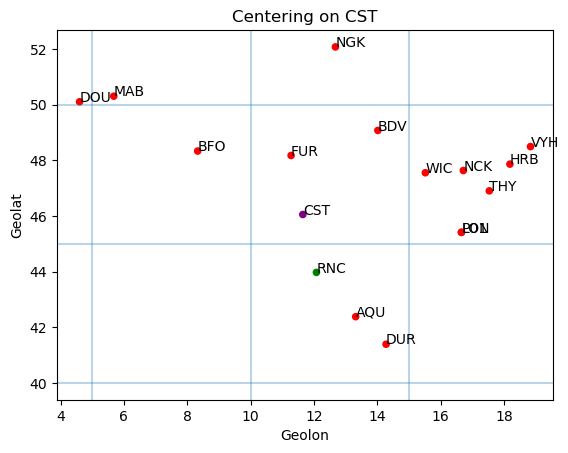

<Figure size 3000x2000 with 0 Axes>

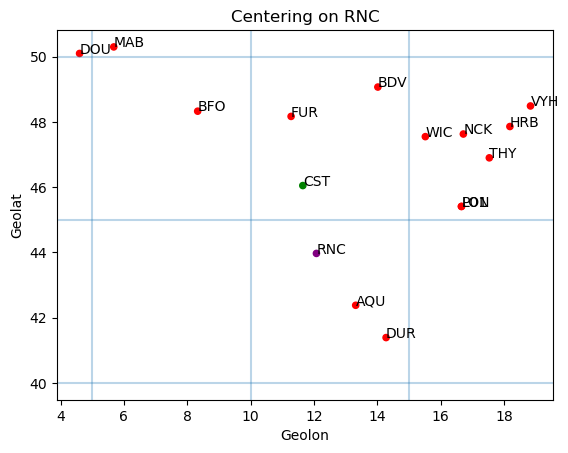

<Figure size 3000x2000 with 0 Axes>

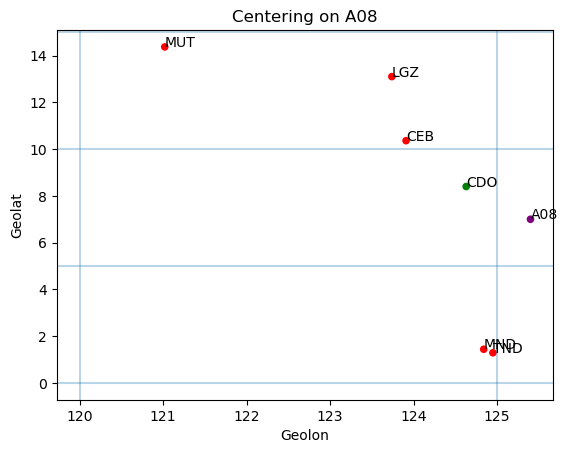

<Figure size 3000x2000 with 0 Axes>

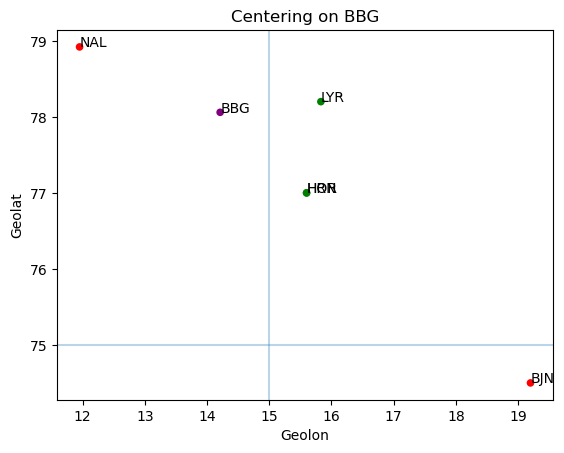

<Figure size 3000x2000 with 0 Axes>

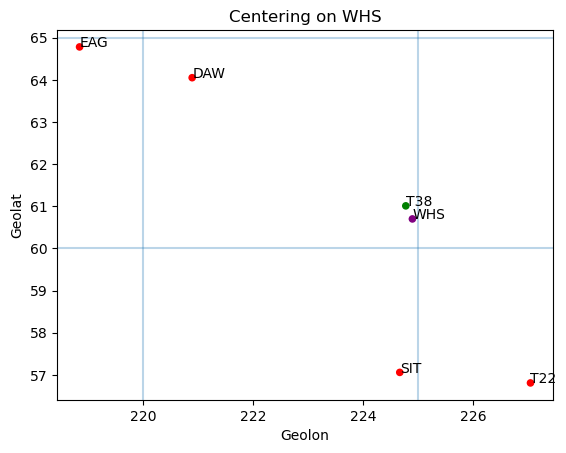

<Figure size 3000x2000 with 0 Axes>

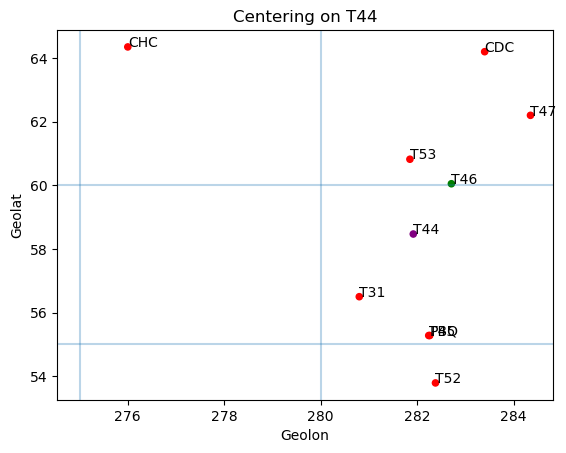

<Figure size 3000x2000 with 0 Axes>

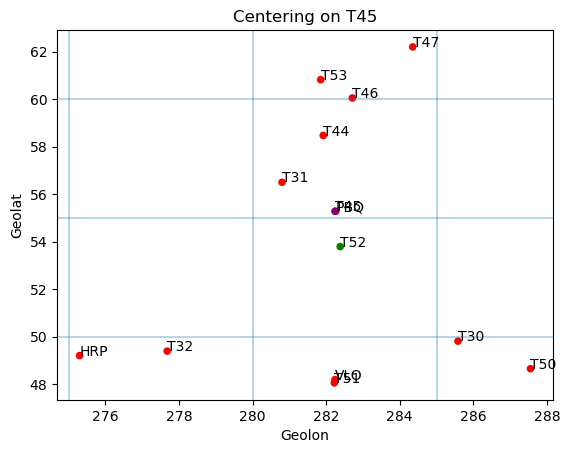

<Figure size 3000x2000 with 0 Axes>

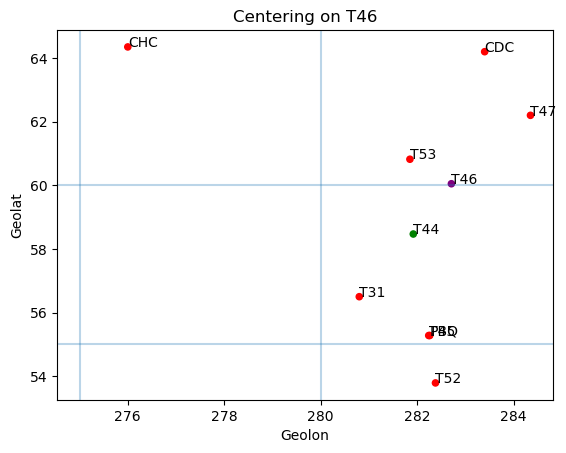

<Figure size 3000x2000 with 0 Axes>

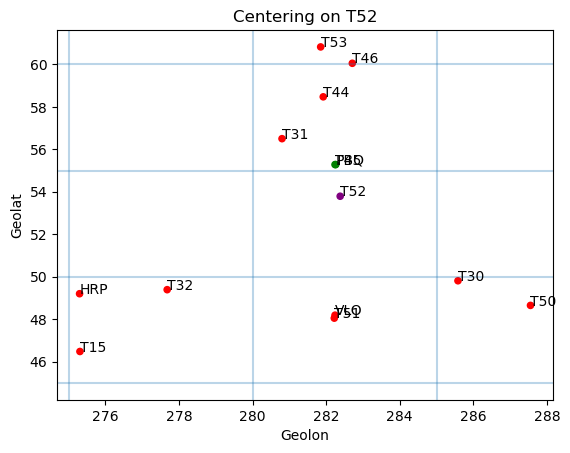

<Figure size 3000x2000 with 0 Axes>

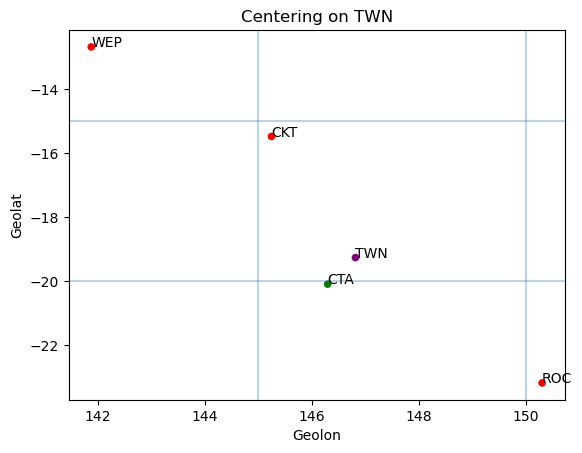

<Figure size 3000x2000 with 0 Axes>

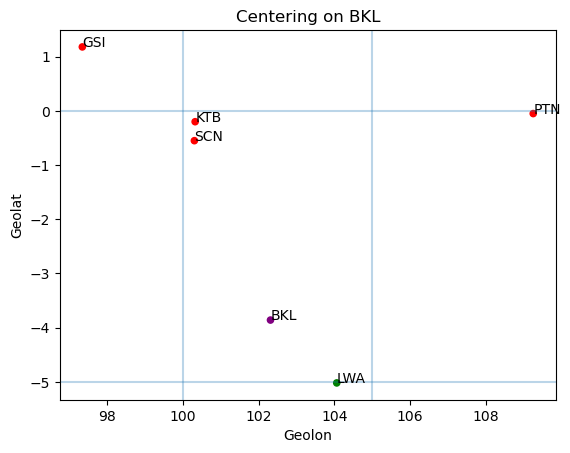

<Figure size 3000x2000 with 0 Axes>

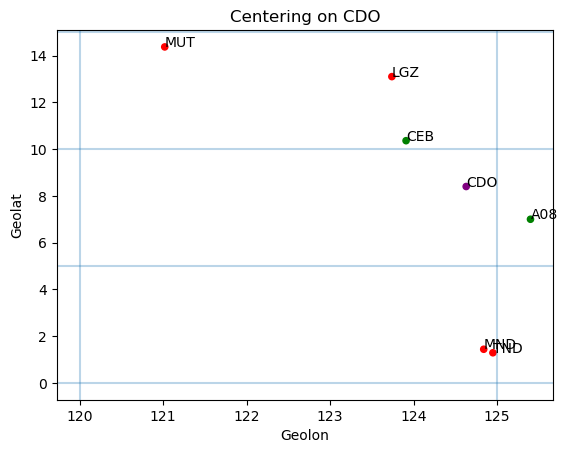

<Figure size 3000x2000 with 0 Axes>

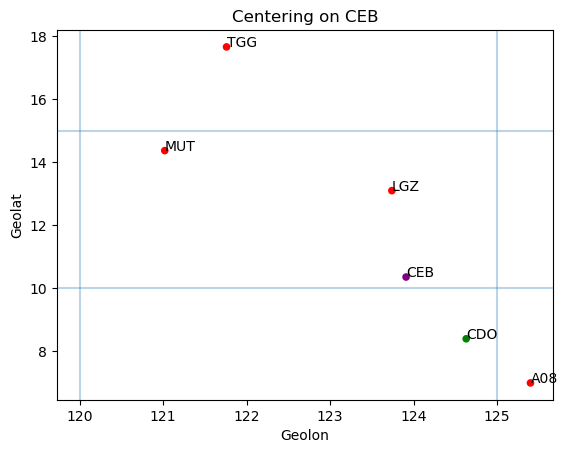

<Figure size 3000x2000 with 0 Axes>

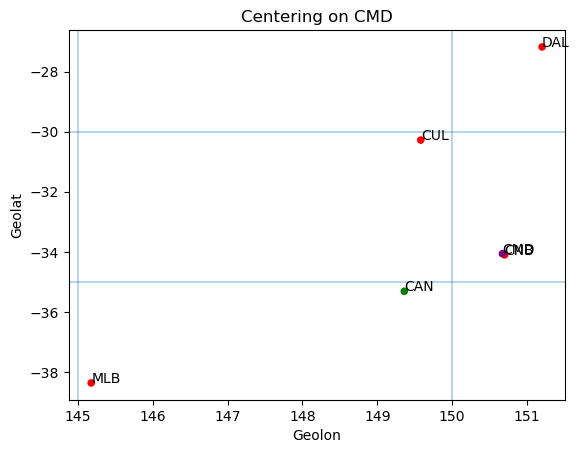

<Figure size 3000x2000 with 0 Axes>

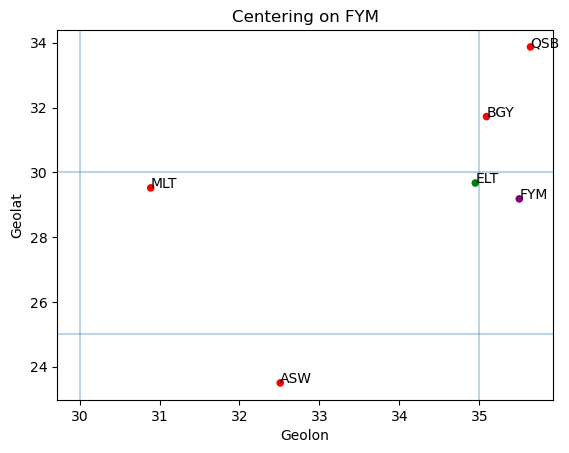

<Figure size 3000x2000 with 0 Axes>

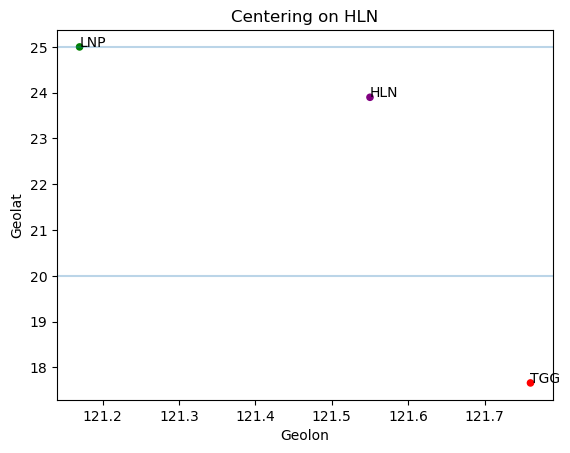

<Figure size 3000x2000 with 0 Axes>

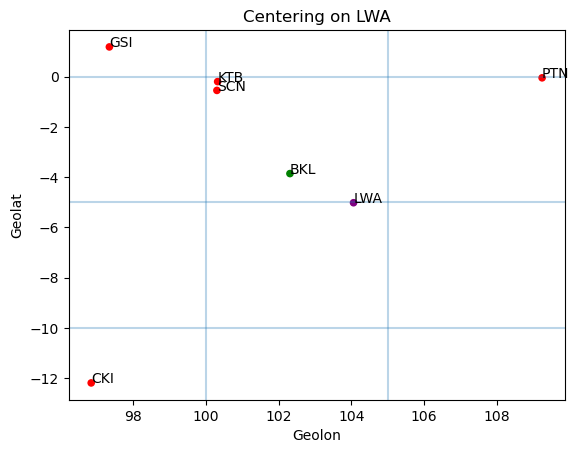

<Figure size 3000x2000 with 0 Axes>

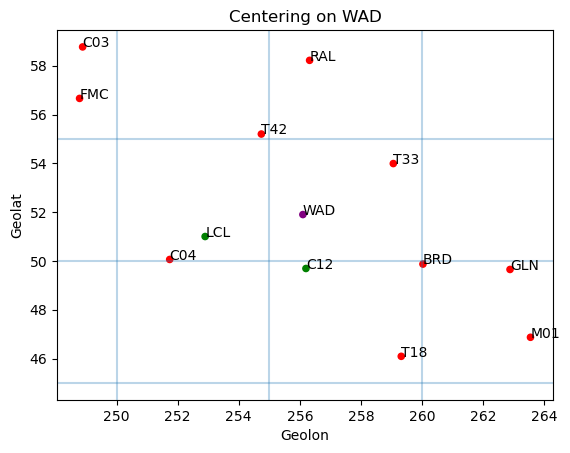

<Figure size 3000x2000 with 0 Axes>

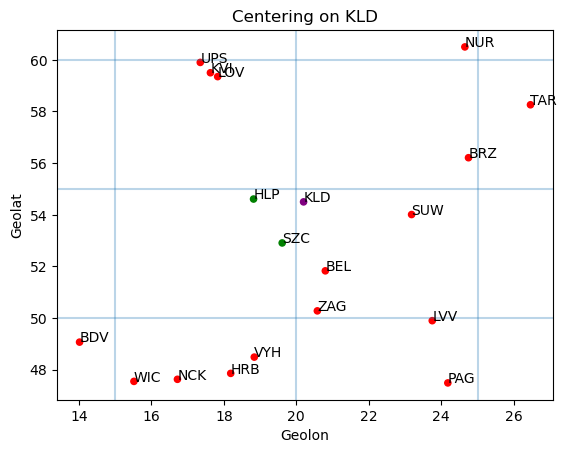

<Figure size 3000x2000 with 0 Axes>

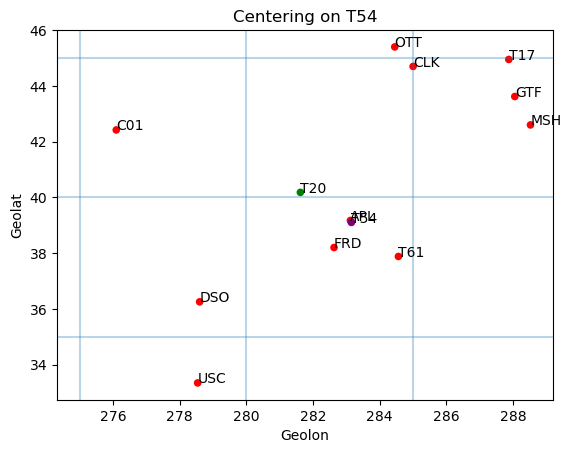

<Figure size 3000x2000 with 0 Axes>

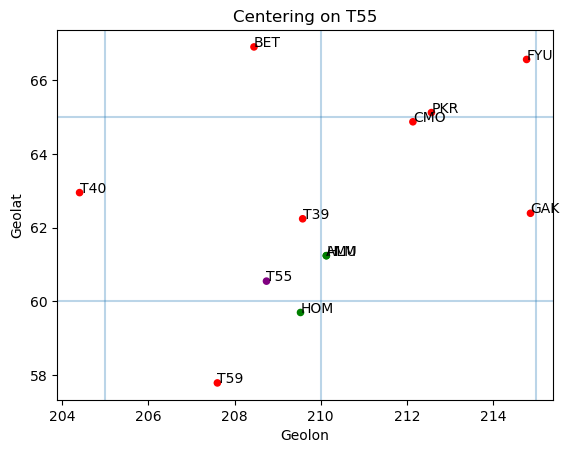

<Figure size 3000x2000 with 0 Axes>

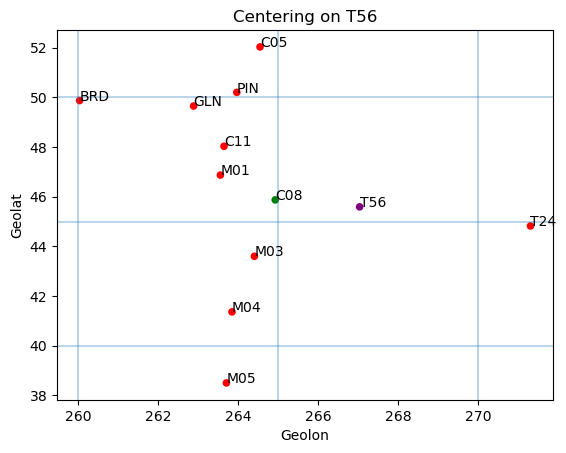

<Figure size 3000x2000 with 0 Axes>

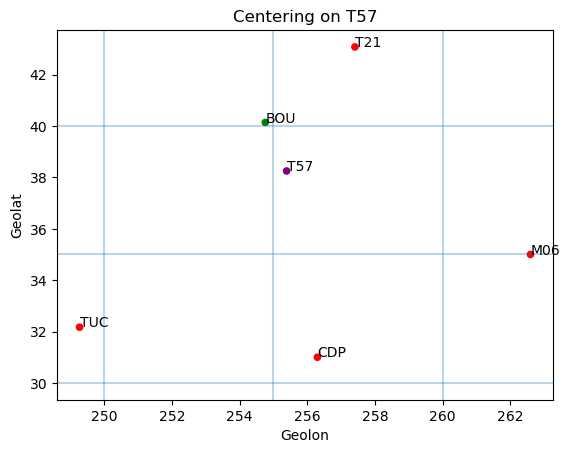

<Figure size 3000x2000 with 0 Axes>

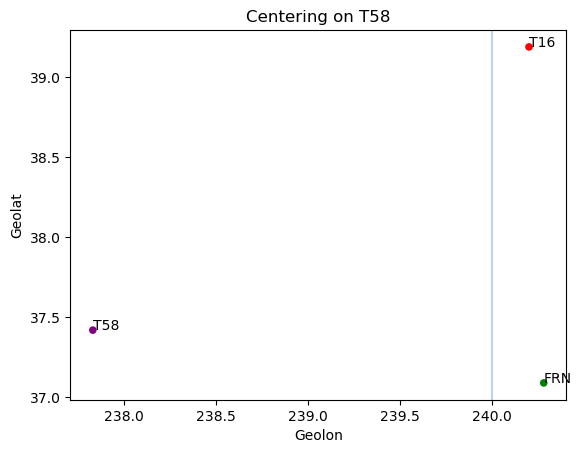

<Figure size 3000x2000 with 0 Axes>

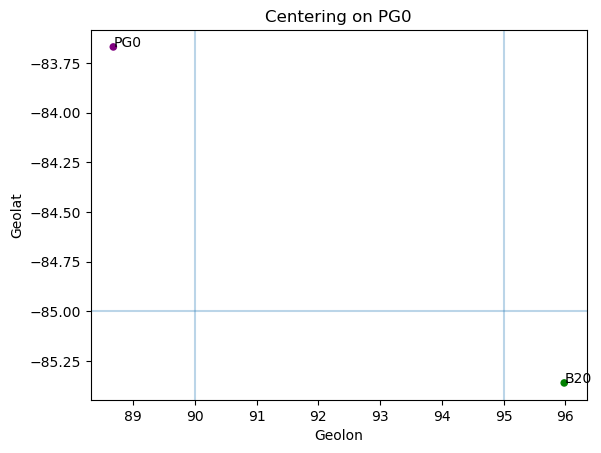

<Figure size 3000x2000 with 0 Axes>

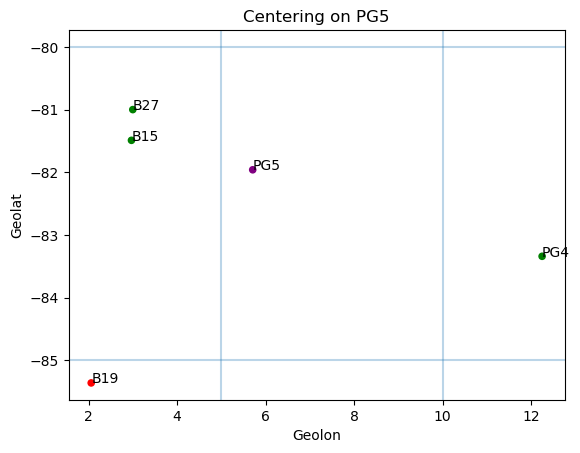

<Figure size 3000x2000 with 0 Axes>

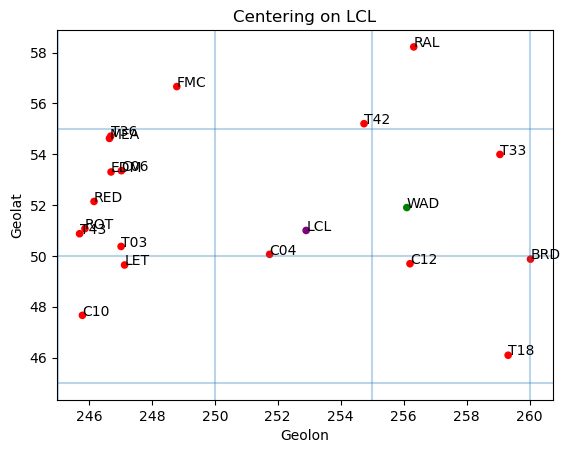

In [148]:
df_copy = df.copy()

for station in stations_close_to_line.keys():

	geolon_base = (df.loc[df['IAGA'] == station]['GEOLON'].item()) - 7.5
	geolat_base = (df.loc[df['IAGA'] == station]['GEOLAT'].item()) - 7.5

	geolon_limit = 15
	geolat_limit = 15

	geolon_size = 5
	geolat_size = 5

	# xlines = [geolon_base+i for i in range(0, geolon_limit+geolon_size, geolon_size)]
	# ylines = [geolat_base+i for i in range(0, geolat_limit+geolat_size, geolat_size)]

	plotting_df = df_copy[df_copy['GEOLON'].between(geolon_base, geolon_base+geolon_limit)]
	plotting_df = plotting_df[plotting_df['GEOLAT'].between(geolat_base, geolat_base+geolat_limit)]

	plotting_df['colors'] = np.nan

	plotting_df.loc[plotting_df['IAGA'].isin(stations_close_to_line[station]), 'colors'] = 'green'
	plotting_df.loc[~plotting_df['IAGA'].isin(stations_close_to_line[station]), 'colors'] = 'red'
	plotting_df.loc[plotting_df['IAGA'] == station, 'colors'] = 'purple'

	# colors = ['red' if plotting_df.iloc[i]['IAGA'] not in stations_close_to_line[station] elif 'green' for i in range(len(plotting_df))]

	fig = plt.figure(figsize=(30,20))
	ax = plotting_df.plot(kind='scatter', x='GEOLON', y='GEOLAT', color=plotting_df['colors'])
	for idx, row in plotting_df.iterrows():
		ax.annotate(row['IAGA'], (row['GEOLON'], row['GEOLAT']))
	
	x_min, x_max = ax.get_xlim()
	y_min, y_max = ax.get_ylim()
	xlines = [i for i in range(int(x_min), int(x_max) + 1) if i % 5 == 0]
	ylines = [i for i in range(int(y_min), int(y_max) + 1) if i % 5 == 0]
	for i in xlines:
		plt.axvline(i, alpha=0.3)
	for j in ylines:
		plt.axhline(j, alpha=0.3)
	
	plt.title(f'Centering on {station}')
	plt.xlabel('Geolon')
	plt.ylabel('Geolat')
	plt.show()